# Stage S6 :

${} \;$ 

$$\textbf{BRADAI Zakaria} \quad \quad - \quad \quad \textbf{MALANDA Sam-Rayden}$$

$$\textbf{L3 Physique SPRINT}$$

$$\textbf{Encadrant : Matthieu Delbecq}$$

$$\textbf{Laboratoire d'accueil : LPENS - équipe Circuits Quantiques Hybrides HQC}$$

${} \;$

${} \;$

#    $$\text{Le gyroscope en tant qu'analogue mécanique d'un Spin 1/2}$$


${} \;$

${} \;$

---------
---
---

In [1]:
from GyroSolver import *
from GyroPhysicalQTE import *
from GyroVerifExpressions import*
import numpy as np
import matplotlib.pyplot as plt

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


  Activating project at `~/.julia/environments/diffeqpy`
  Activating project at `~/.julia/environments/diffeqpy`


# I- Introduction :

Ce stage est réalisé dans le cadre de l'UE LU3PY205 du S6, au sein de l'équipe Circuits Quantiques Hybrides $HCQ$ du Laboratoire de Physique de l'École Normale Supérieure d'Ulm $LPENS$, sous l'encadrement du Dr. Matthieu Delbecq.


ZID ?


$\;$

# II- Mouvement libre du Gyroscope :

Comme il a été détaillé dans l'étude théorique, l'Hamiltonien du système $\{\text{Gyroscope}\}$ dans le référentiel du laboratoire supposé galiléen est :

$$\mathcal{H}_\text{libre} = \dfrac{p_\theta^2}{2 \tilde{J_1}} + \dfrac{p_\psi^2}{2 J_3} + \dfrac{\left( p_\varphi - \cos(\theta)p_\psi \right)^2}{2\tilde{J_1} \sin^2(\theta)} + mgh\cos(\theta) $$

Cet Hamiltonien peut se mettre sous la forme plus commode :

$$\mathcal{H}_\text{libre} = \mathcal{T}_\psi + \mathcal{T}_\theta + \mathcal{N} - \overrightarrow{PG} \cdot m\overrightarrow{g} $$

Où $\mathcal{T}_\psi$ représente l'énergie de rotation "propre", $\mathcal{T}_\theta$ l'énergie de rotation dûe à la Nutation (variation de la colatitude $\theta$), et enfin $\mathcal{N}$ le terme divergent responsable de la Nutation. 

On intoduit les moments conjugués aux angles d'Euler :

$$ \left\{ \begin{array}{r c l c l} 
p_\theta & = & \tilde{J}_1 \dot{\theta}  \\
p_\varphi & = & \tilde{J}_1 \sin^2(\theta) \dot{\varphi} + \cos(\theta) p_\psi  \\
p_\psi & = &  J_3\left( \dot{\psi} + \cos(\theta) \dot{\varphi} \right)
\end{array}   \right. $$  

Où $\tilde{J}_1 = J_1 + mh^2$

$\;$

Étant donné la cyclicité des coordonnées $\varphi$ et $\psi$, les moments conjugués $p_\varphi$ et $p_\psi$ sont des constantes du mouvement. 


$\;$


Pour la simulation numérique, on déduit les équations du mouvement à partir des équation de Hamilton, on alors :



$$ \left\{ \begin{array}{r c l c l} 
\ddot{\theta} & = & \dfrac{mgh}{\tilde{J_1}} \sin(\theta) - \dfrac{p_\psi }{\tilde{J_1}}  \sin(\theta) \dot{\varphi}+\sin(\theta)\cos(\theta) (\dot{\varphi})^2  \\
\ddot{\varphi} & = & -\dfrac{2}{\tan(\theta)}\dot{\theta}\dot{\varphi} + \dfrac{p_\psi}{\tilde{J_1} \sin(\theta)}\dot{\theta}   \\
\ddot{\psi} & = &  \dfrac{1+\cos^2(\theta)}{\sin(\theta)}\dot{\theta}\dot{\varphi} - \dfrac{p_\psi}{\tilde{J_1} \tan(\theta)}\dot{\theta} 
\end{array}   \right. $$  



On obtient ainsi un système de 3 équations différentielles non-linéraires couplées d'ordre 2.

On s'est efforcé de faire apparaîtrela constante du mouvement $p_\psi$ pour simplifier les expressions des équations du mouvement. Sa valeur est évaluée uniquement à $t=0 \quad \left [ p_\psi(t) = p_\psi(t=0) \quad \forall t   \right ]$ .


$\;$

**Remarque :**

Les paramètres du problème sont estimés à partir des valeurs constructeurs du Gyroscope.


$\;$

In [2]:
g = 9.81           # m/s^2
m = 0.375          # kg
J3 = 0.000055      # kg.m^2
J1 = 0.000055      # kg.m^2
h = 31.25 * 1e-3   # m
x0 =  0.1          # m
omega_exc = 1.663      # Hertz
Phi = np.pi

params = [g, m, h, J1, J3 , x0, Phi, omega_exc]
CI = [np.pi / 24, 0, 0, 0, 0, 2 * np.pi * 200]

Gyro_Carac_Values(params, CI)

Larmor Pulsation (th) :               +1.663
Larmor Frequency (th) :               +0.265
Larmor Period (th) :               +3.777 

Rabi Pulsation (th) :               +0.023
Rabi Period (th) :             +267.989
Temps de montée (th) :             +133.994 

Rapport des pulsations Larmor/Rabi :              +70.944 

Rapport Approx Gyroscopique :          +14_912.892 



$\;$

On considérera les conditions initiales comme suit :

$$ \left .  \begin{pmatrix} \theta \\ \dot{\theta} \\ \varphi \\ \dot{\varphi} \\ \psi \\ \dot{\psi} \end{pmatrix} \right \vert_{t=0} = \begin{pmatrix} \theta_0 \\ 0 \\ 0 \\ \dot{\varphi}_0 \\ 0 \\ \dot{\psi}_0 \end{pmatrix} $$

Où $\dot{\psi}_0 = 2\pi \cdot 200 \mathrm{s}^{-1}$ est la fréquence max de rotation propre du gyroscope, $\theta_0$ et $\dot{\varphi}_0$ sont des valeurs que l'on fera varier. De plus le choix des valeurs initiales des angles $\varphi$ et $\psi$ sont à-priori arbitraires dans le régime libre, on fixera donc $\varphi(0) = \psi(0) = 0$.


$\;$


Vérifions dans un premier temps la validité de la résolution numérique, en particulier si l'on retrouve bien les régimes attendus ainsi que la constance de $p_\varphi$ et $p_\psi$.

$\;$

### II.1 Résolution numérique des équations du mouvement - cas $\dot{\varphi}(t=0) = 0$ :

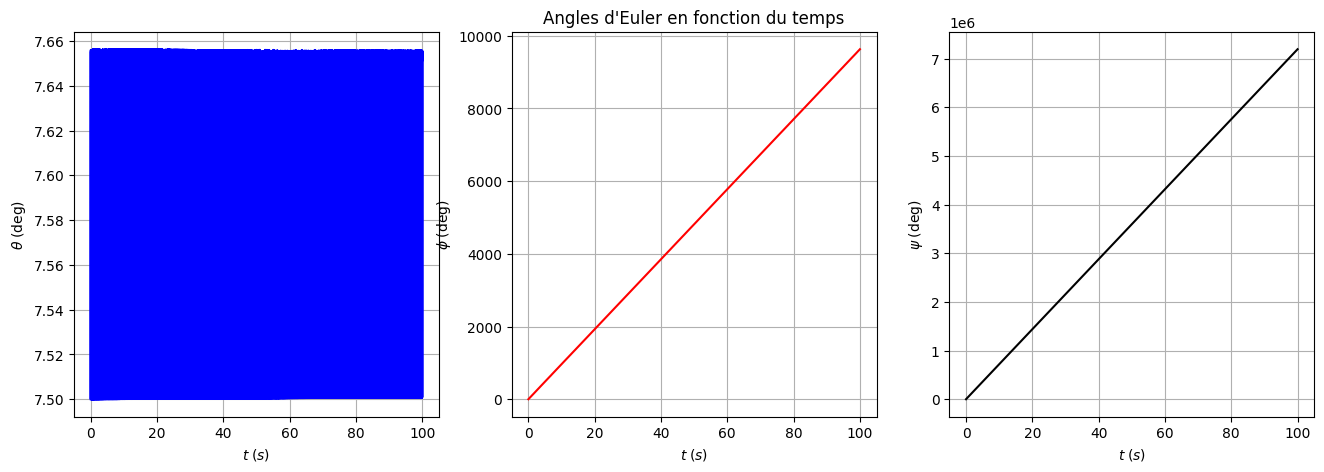

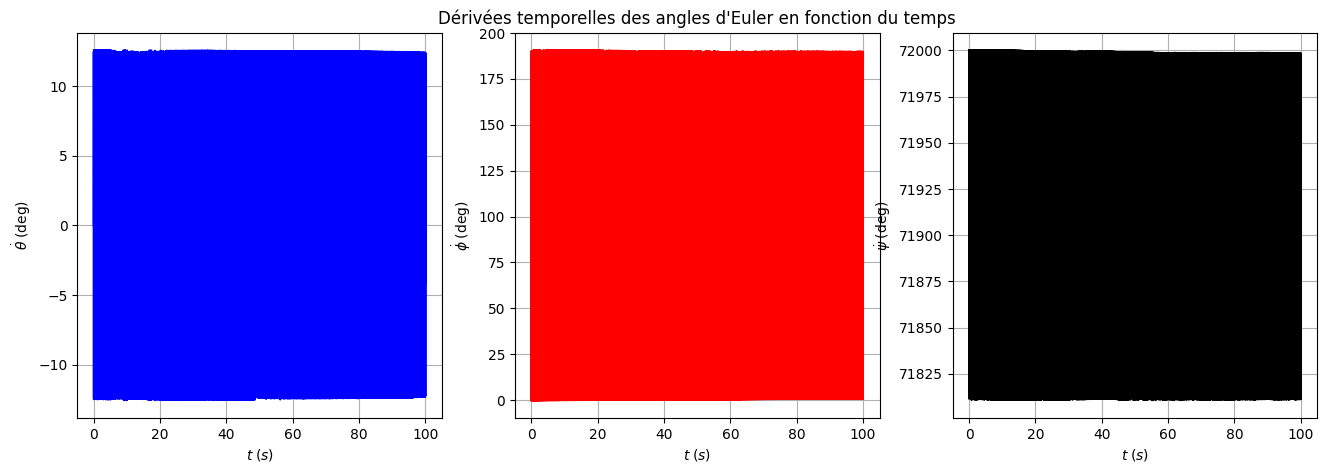

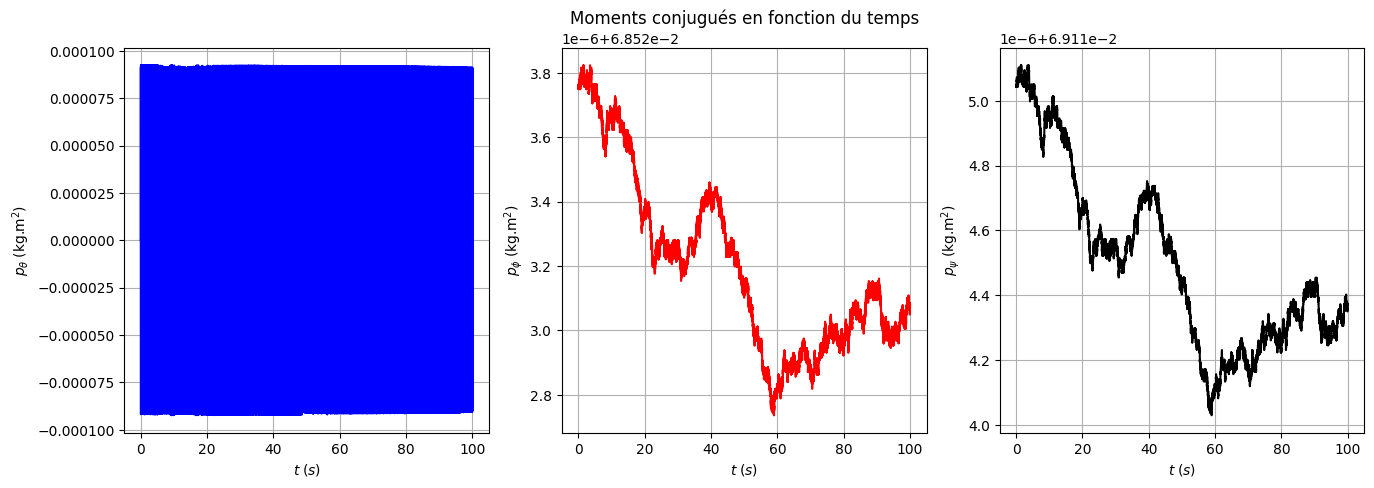

┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase ~/.julia/packages/SciMLBase/sakPO/src/performance_warnings.jl:33


In [3]:
tspan = (0., 100.)

t, the, the_d, phi, phi_d, psi, psi_d = Gyro_Solver(tspan, CI, params, forcing='Free')


p_the, p_phi, p_psi = Conjugated_Momentums(the, phi, psi, the_d, phi_d, psi_d, params)

Plot_Gyro_Angles(t, the, phi, psi)

Plot_Gyro_Speed_Angles(t, the_d, phi_d, psi_d)

Plot_Gyro_Momentum(t, p_the, p_phi, p_psi)



In [4]:
### Pour visualiser la trajectoire

#Get_Path(t, the, phi, psi)

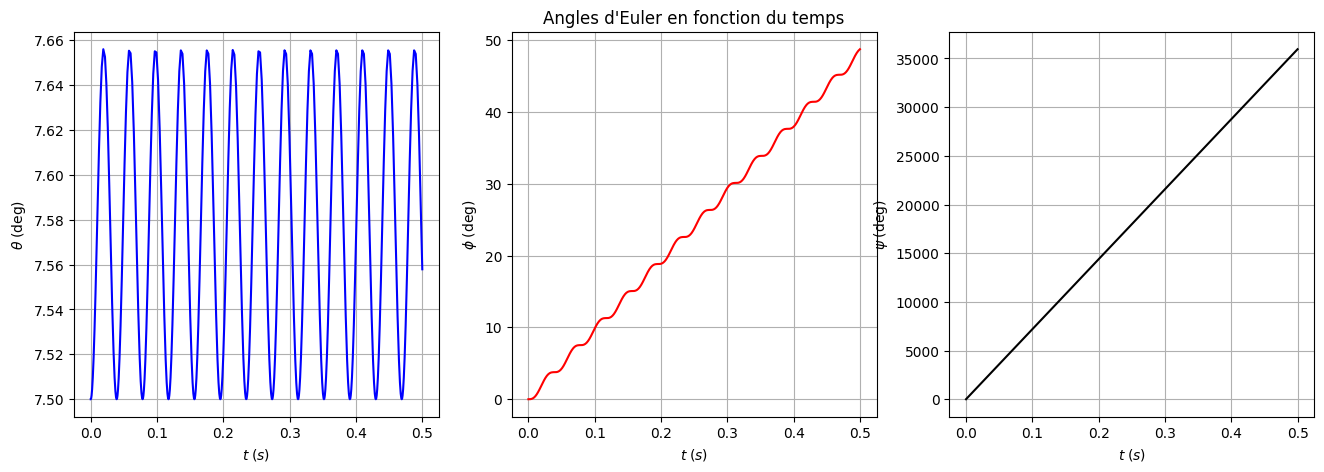

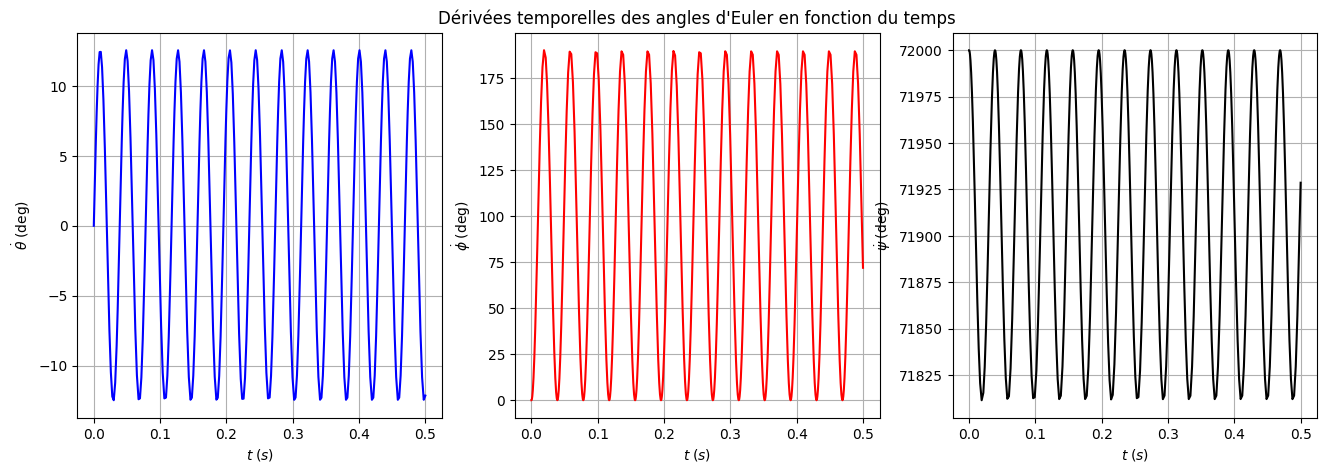

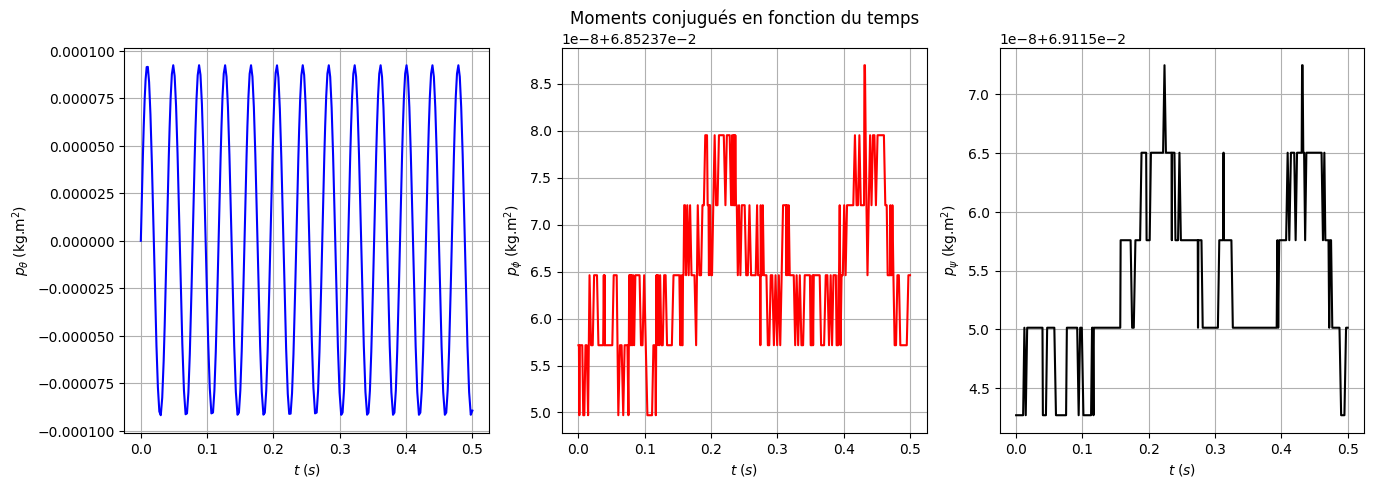

In [5]:
tspan = (0., 0.5)

t, the, the_d, phi, phi_d, psi, psi_d = Gyro_Solver(tspan, CI, params, forcing='Free')


p_the, p_phi, p_psi = Conjugated_Momentums(the, phi, psi, the_d, phi_d, psi_d, params)

Plot_Gyro_Angles(t, the, phi, psi)

Plot_Gyro_Speed_Angles(t, the_d, phi_d, psi_d)

Plot_Gyro_Momentum(t, p_the, p_phi, p_psi)


In [6]:
### Pour visualiser la trajectoire

#Get_Path(t, the, phi, psi)

* On trouve bien que $p_\varphi$ et $p_\psi$ sont constants (dans la limite de la précision numérique, en effet dans les 2 cas nous avons des fluctuations relatives de l'ordre de $10^{-5}$).

* On confirme que les valeurs des paramètres correspondent à l'approximation gyroscopique, l'amplitude de nutation $\Delta \theta \approx 0.3^\circ$ est négligeable, et surtout la nutation ne serait pas visible à l'œil.

* De plus en valeur moyenne temporelle $\left <  p_\theta \right> = 0$, de plus $\dfrac{\mathrm{max}(p_\theta)}{p_\psi} \approx \dfrac{\mathrm{max}(p_\theta)}{p_\varphi} \approx 10^{-3} $, ainsi on peux estimer que $p_\theta \approx 0$.

* La fréquence de nutation est très élevée.

* Étant donné que l'on a fixé en condition initiale $\dot{\varphi}(t=0) = 0$, le gyroscope décrit des sortes de **cycloïdes** sur la sphères de Bloch (comme on peut le visualiser avec la cellule précédente), $\dot{\varphi}$ s'annule périodiquement sans prendre de valeurs négatives .

$\;$


### II.2 Résolution numérique des équations du mouvement - cas $ \; \dot{\varphi}(t=0) < 0$ :

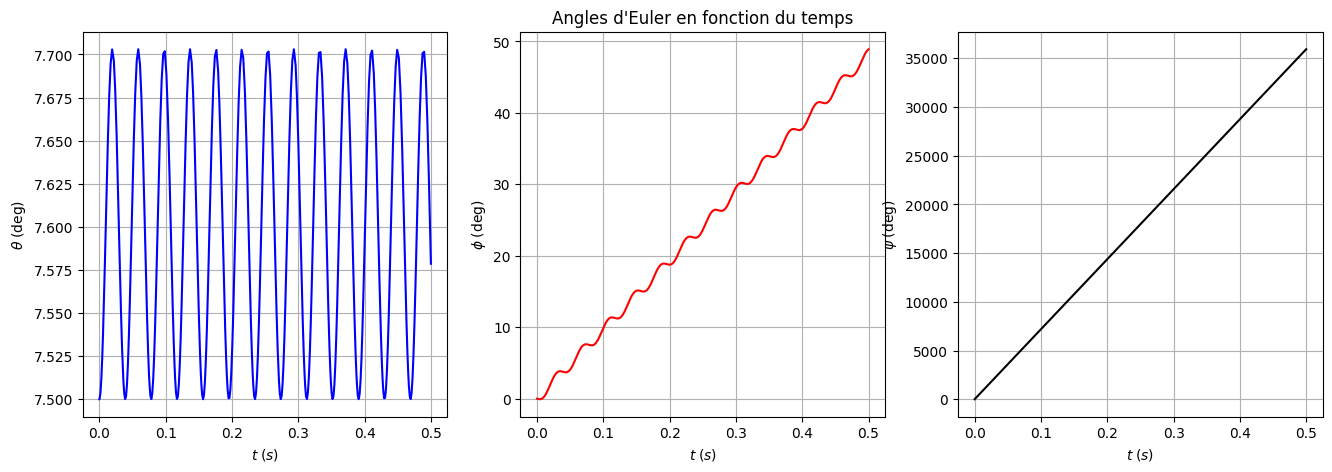

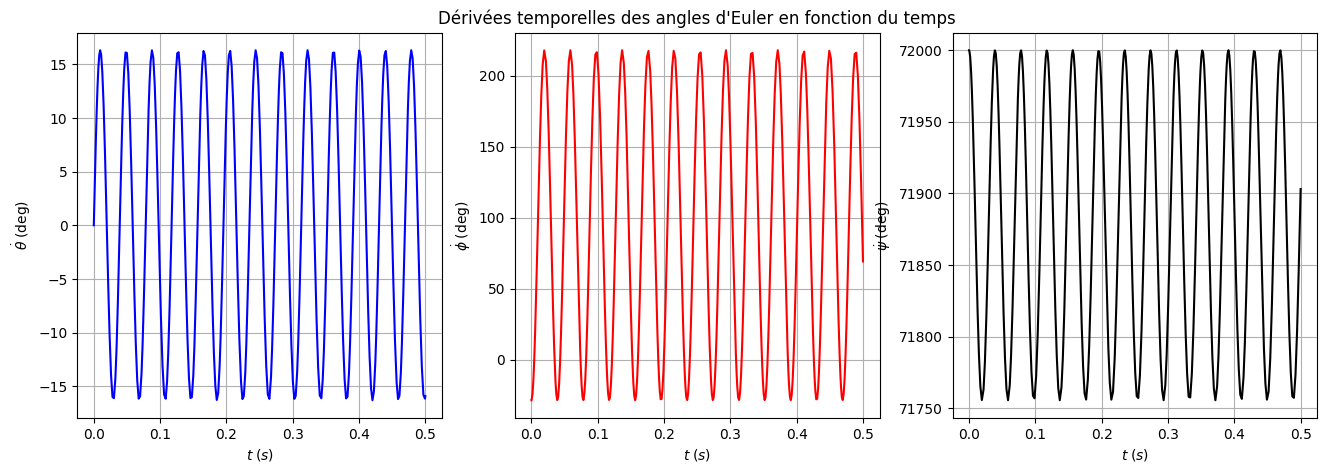

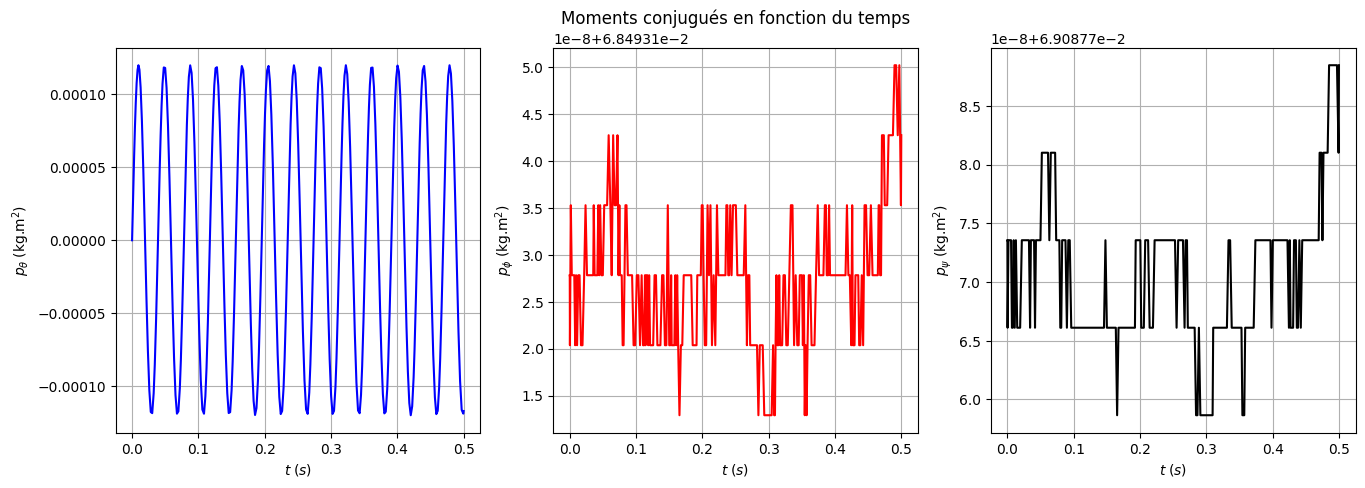

In [7]:
CI = [ np.pi /24, 0, 0, -0.5, 0, 2 * np.pi * 200]

tspan = (0., 0.5)

t, the, the_d, phi, phi_d, psi, psi_d = Gyro_Solver(tspan, CI, params, forcing='Free')


p_the, p_phi, p_psi = Conjugated_Momentums(the, phi, psi, the_d, phi_d, psi_d, params)

Plot_Gyro_Angles(t, the, phi, psi)

Plot_Gyro_Speed_Angles(t, the_d, phi_d, psi_d)

Plot_Gyro_Momentum(t, p_the, p_phi, p_psi)

In [8]:
### Pour visualiser la trajectoire

#Get_Path(t, the, phi, psi)

Encore une fois, on retrouve les mêmes constats que précédemment, à la différence notable :

* L'amplitude de nutation est légèrement plus grande $\Delta \theta \approx 0.2^\circ $ mais reste marginale.

* Sur une courte durée $\dot{\varphi} < 0$, ce qui correspond au régime où le gyroscope décrit une trajectroire à boucles.



$\;$




### II.3 Résolution numérique des équations du mouvement - cas $ \; \dot{\varphi}(t=0) = \Omega_L$ :

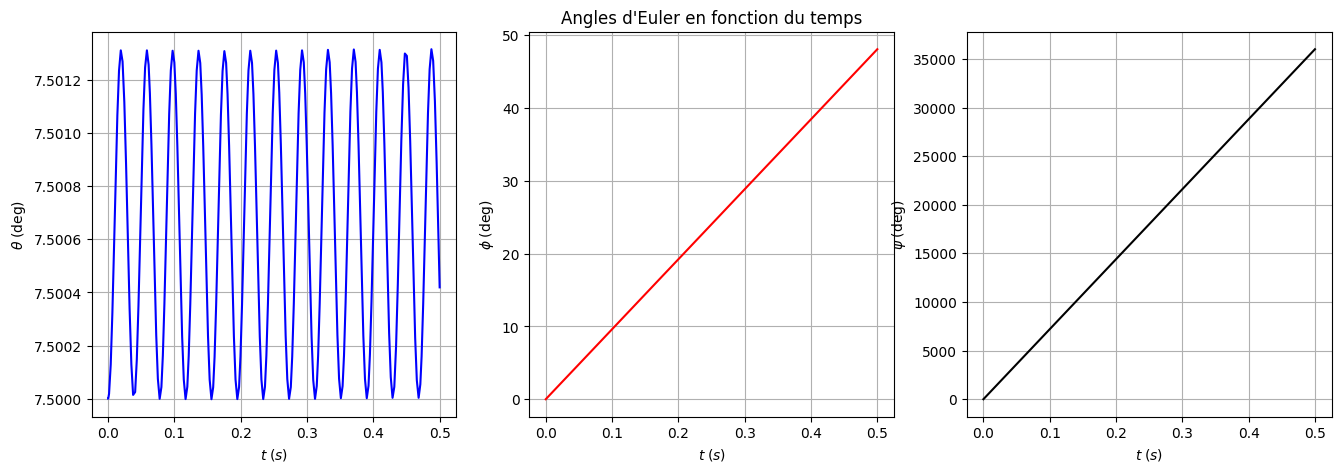

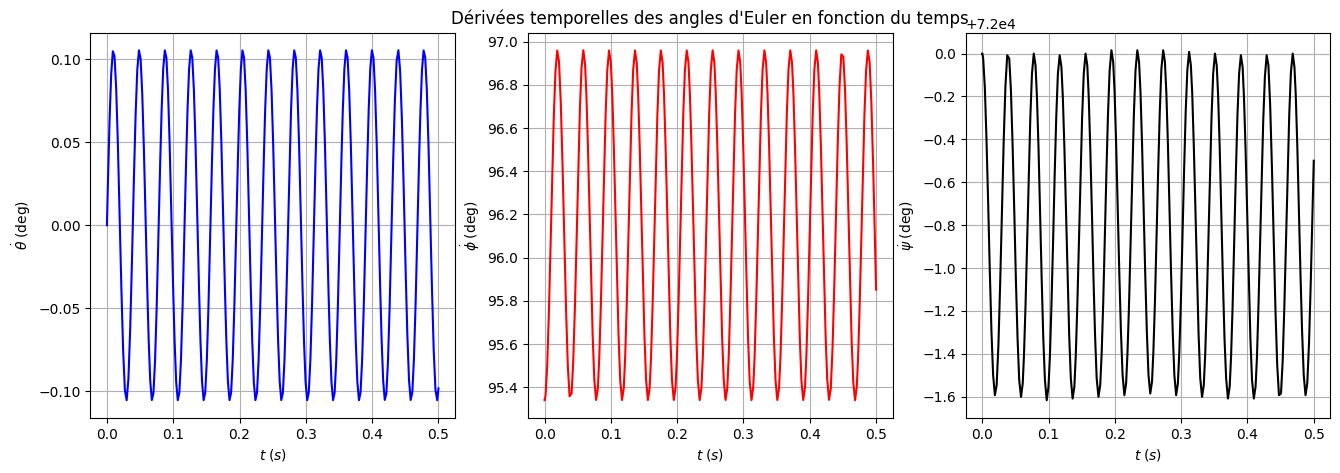

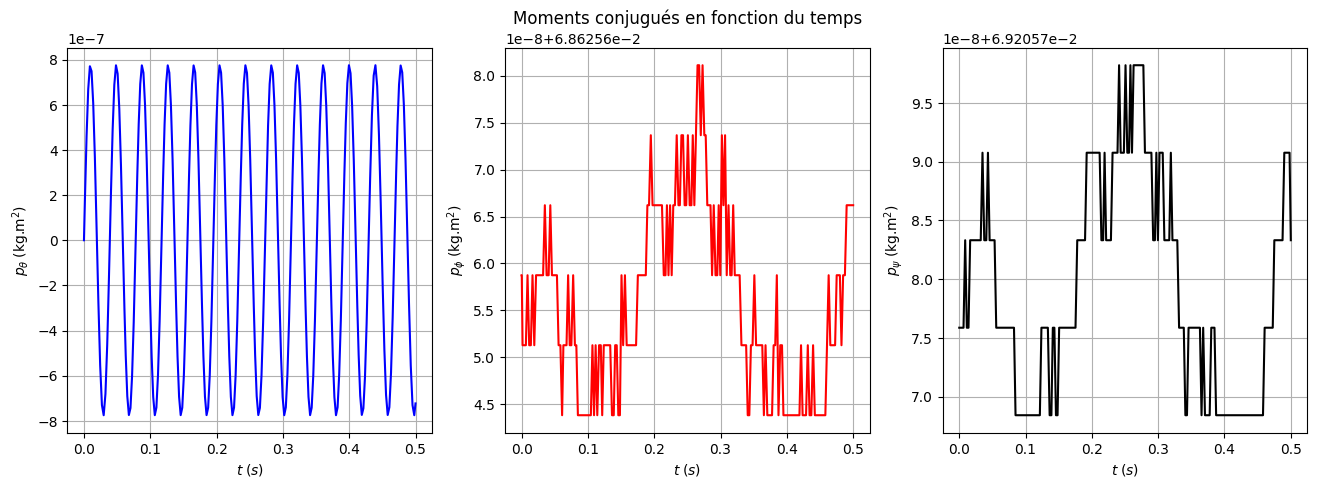

In [9]:
CI = [np.pi / 24, 0, 0, 1.664, 0, 2 * np.pi * 200]

tspan = (0., 0.5)

t, the, the_d, phi, phi_d, psi, psi_d = Gyro_Solver(tspan, CI, params, forcing='Free')


p_the, p_phi, p_psi = Conjugated_Momentums(the, phi, psi, the_d, phi_d, psi_d, params)

Plot_Gyro_Angles(t, the, phi, psi)

Plot_Gyro_Speed_Angles(t, the_d, phi_d, psi_d)

Plot_Gyro_Momentum(t, p_the, p_phi, p_psi)


In [10]:
### Pour visualiser la trajectoire

#Get_Path(t, the, phi, psi)

Encore une fois, on retrouve les mêmes constats que précédemment, à la différence notable :

* L'amplitude de nutation est notablement plus faible $\Delta \theta \approx 2.5 \cdot 10^{-3}$

* Cette fois on a posé $\dot{\varphi}(t=0) \approx \Omega_L$, ce qui donne $\varphi(t) \approx \omega_L \cdot t$


Ainsi, ce régime se rapproche le plus à la précession pure (sans nutation).



$\;$

Nous ne nous attarderons pas à caractériser d'avantage le mouvement libre du gyroscope (fréquence de nutation, fréquence de variation de $\dot{\varphi}$, spectre des angles $\theta_{(t)}$ et $\varphi_{(t)}$).

$\;$



### II.4 Expression de la fréquence de Larmor $\Omega_L$ :

Vérifions si l'on retrouve numériquement l'expression de la fréquence de Larmor :

$$ \Omega_L = \dfrac{mgh}{p_\psi} $$


Et ce dans les 3 régimes de mouvement via des ajustements linéaires (en intégrant les équations du mouvement jusqu'à $t=100\mathrm{s}$).

$\;$


Valeurs théoriques
Régime avec boucles : omega_L_th = 1.66398
Régime avec rebroussement : omega_L_th = 1.66333
Régime dit parfait : omega_L_th = 1.66115 
 

Valeurs numériques
Régime avec boucles : omega_L_num = 1.68098 +/- 0.0
Régime avec rebroussement : omega_L_num = 1.68046 +/- 0.0
Régime dit parfait : omega_L_num = 1.67814 +/- 0.0 
 



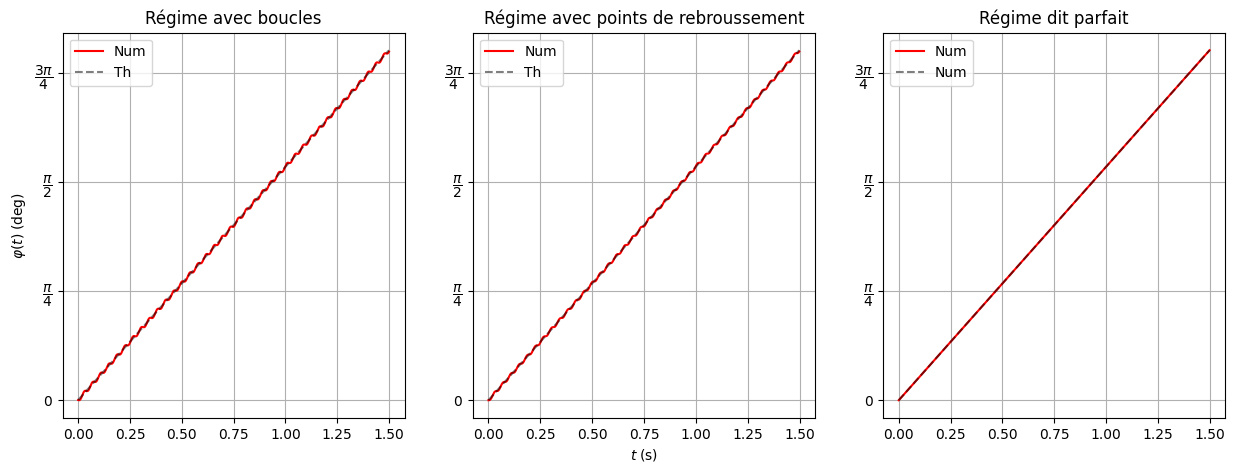

In [11]:
CI_boucles = [np.pi / 24, 0, 0, -0.5, 0, 2 * np.pi * 200]
CI_rebrousse = [np.pi / 24, 0, 0, 0, 0, 2 * np.pi * 200]
CI_perfect = [np.pi / 24, 0, 0, 1.664, 0, 2 * np.pi * 200]

omega_L_th_boucles, _ = np.round(Compute_Carac_Pulsations(params, CI_boucles), 5)
omega_L_th_rebrousse, _ = np.round(Compute_Carac_Pulsations(params, CI_rebrousse), 5)
omega_L_th_perfect, _ = np.round(Compute_Carac_Pulsations(params, CI_perfect), 5)


tspan = (0., 100)


t_boucles, _, _, phi_boucles, _, _, _ = Gyro_Solver(tspan, CI_boucles, params, forcing='Free')
t_rebrousse, _, _, phi_rebrousse, _, _, _ = Gyro_Solver(tspan, CI_rebrousse, params, forcing='Free')
t_perfect, _, _, phi_perfect, _, _, _ = Gyro_Solver(tspan, CI_perfect, params, forcing='Free')


omega_L_num_boucles, sigma_boucles = np.round(Get_Larmor_Freq(t_boucles, phi_boucles, 
                                omega_L_th_boucles, full_output='False'), 5)
omega_L_num_rebrousse, sigma_rebrousse = np.round(Get_Larmor_Freq(t_rebrousse, phi_rebrousse, 
                                omega_L_th_rebrousse, full_output='False'), 5)
omega_L_num_perfect, sigma_perfect = np.round(Get_Larmor_Freq(t_perfect, phi_perfect, 
                                omega_L_th_perfect, full_output='False'), 5)

print("Valeurs théoriques")
print("Régime avec boucles : omega_L_th =", omega_L_th_boucles)
print("Régime avec rebroussement : omega_L_th =", omega_L_th_rebrousse)
print("Régime dit parfait : omega_L_th =", omega_L_th_perfect, '\n \n')

print("Valeurs numériques")
print("Régime avec boucles : omega_L_num =", omega_L_num_boucles, '+/-', sigma_boucles)
print("Régime avec rebroussement : omega_L_num =", omega_L_num_rebrousse, '+/-', sigma_rebrousse)
print("Régime dit parfait : omega_L_num =", omega_L_num_perfect, '+/-', sigma_perfect, '\n \n')

bool_boucles = t_boucles <= 1.5
bool_rebrousse = t_rebrousse <= 1.5
bool_perfect = t_perfect <= 1.5


plt.figure(figsize=[15,5])
plt.subplot(1, 3, 1)
plt.title("Régime avec boucles")
plt.ylabel(r'$ \varphi(t) \; (\mathrm{deg})$')
plt.plot(t_boucles[bool_boucles], phi_boucles[bool_boucles], 'r', label='Num')
plt.plot(t_boucles[bool_boucles], AngleRef(t_boucles[bool_boucles], omega_L_num_boucles, 0), 'k--', alpha=0.5, label='Th')
plt.grid()
plt.legend()
plt.yticks([0, np.pi / 4, np.pi / 2, 3 * np.pi / 4], 
           [r'$0$', r'$\dfrac{\pi}{4}$', r'$\dfrac{\pi}{2}$', r'$\dfrac{3\pi}{4}$'])

plt.subplot(1, 3, 2)
plt.title("Régime avec points de rebroussement")
plt.plot(t_rebrousse[bool_rebrousse], phi_rebrousse[bool_rebrousse], 'r', label='Num')
plt.plot(t_rebrousse[bool_rebrousse], AngleRef(t_rebrousse[bool_rebrousse], omega_L_num_rebrousse, 0), 'k--', alpha=0.5, label='Th')
plt.legend()
plt.grid()
plt.xlabel(r'$t \; (\mathrm{s})$')
plt.yticks([0, np.pi / 4, np.pi / 2, 3 * np.pi / 4], 
           [r'$0$', r'$\dfrac{\pi}{4}$', r'$\dfrac{\pi}{2}$', r'$\dfrac{3\pi}{4}$'])

plt.subplot(1, 3, 3)
plt.title("Régime dit parfait")
plt.plot(t_perfect[bool_perfect], phi_perfect[bool_perfect], 'r', label='Num')
plt.plot(t_perfect[bool_perfect], AngleRef(t_perfect[bool_perfect], omega_L_num_perfect, 0), 'k--', alpha=0.5, label='Num')
plt.legend()
plt.grid()
plt.yticks([0, np.pi / 4, np.pi / 2, 3 * np.pi / 4], 
           [r'$0$', r'$\dfrac{\pi}{4}$', r'$\dfrac{\pi}{2}$', r'$\dfrac{3\pi}{4}$'])


plt.show()


$\;$

*In-fine*, on retrouve bien numériquement la formule attendue de la pulsation de Lamor :

$$ \Omega_L = \dfrac{mgh}{p_\psi} $$

Et ce, dans les 3 régimes de mouvement possibles du gyroscope libre (l'écart relatif entre les pulsation de Larmor théoriques et numériques dans les 3 régime de Nutation est inférieure à $1\%$).


$\;$

**Remarque :**

En pratique, on lâche le gyroscope idéalement sans vitesse initiale et on n'observe pas la nutation. Ainsi on se restreindra à la condition initiale $\dot{\varphi} = 0$, qui donne comme nous l'avons vu précédemment un amplitude de nutation sufissament faible pour ne pas être observale à l'oeil nu.  




$\;$

### II.5 Termes de l'Hamiltonien :

Un dernier critère d'évaluation de la cohérence des implémentations numérique avec nos calculs théorique, est la constance des termes de l'Hamiltonien.

On rappelle les notations : 

$$\mathcal{H}_\text{libre} = \dfrac{p_\theta^2}{2 \tilde{J_1}} + \dfrac{p_\psi^2}{2 J_3} + \dfrac{\left( p_\varphi - \cos(\theta)p_\psi \right)^2}{2\tilde{J_1} \sin^2(\theta)} + mgh\cos(\theta) = \mathcal{T}_\theta + \mathcal{T}_\psi + \mathcal{N} + mgh\cos(\theta)  $$ 

Où :

- $\mathcal{T}_\theta = \dfrac{p_\theta^2}{2 \tilde{J}_1}$ est l'énergie cinétique de Nutation.
- $\mathcal{T}_\theta = \dfrac{p_\psi^2}{2 \tilde{J}_1}$ est l'énergie cinétique de rotation propre.
- $\mathcal{N} = \dfrac{\left( p_\varphi - \cos(\theta)p_\psi \right)^2}{2\tilde{J_1} \sin^2(\theta)}$ est le terme de Nutation.
- $mgh\cos(\theta)$ est l'énergie potentielle de pesanteur.


$\;$

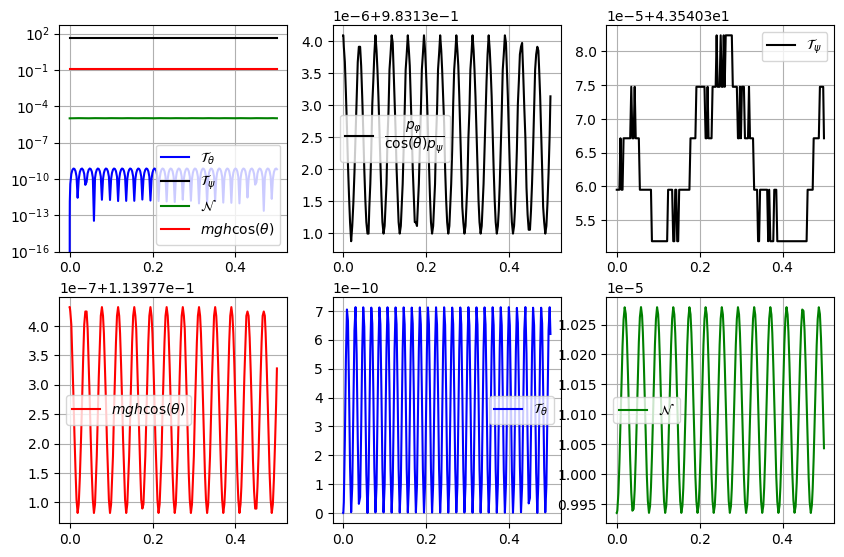

In [12]:
Ec_theta, Ec_psi, Nutation, Epp = Hamiltonian_Terms(t, the, phi, psi, the_d, phi_d, psi_d, params, forcing='Free')

plt.figure(figsize=[10, 10])

plt.subplot(3, 3, 1)
plt.plot(t, Ec_theta, label=r'$ \mathcal{T}_\theta$', color='b')
plt.plot(t, Ec_psi, label=r'$ \mathcal{T}_\psi$', color='k')
plt.plot(t, Nutation, label=r'$ \mathcal{N}$', color='g')
plt.plot(t, Epp, label=r'$ mgh\cos(\theta)$', color='r')
plt.grid()
plt.yscale('log')
plt.ylim([10e-17, 500])
plt.legend()


plt.subplot(3, 3, 2)
#plt.plot(t, Ec_theta, label=r'$ \mathcal{T}_\theta$')
#plt.plot(t, Nutation, label=r'$ \mathcal{N}$')
plt.plot(t, p_phi / p_psi * np.cos(the), label=r'$\dfrac{p_\varphi}{\cos(\theta) p_\psi}$', color='k')
plt.grid()
plt.legend()



plt.subplot(3, 3, 3)
plt.plot(t, Ec_psi, label=r'$ \mathcal{T}_\psi$', color='k')
plt.grid()
plt.legend()


plt.subplot(3, 3, 4)
plt.plot(t, Epp, label=r'$ mgh\cos(\theta)$', color='r')
plt.grid()
plt.legend()


plt.subplot(3, 3, 5)
plt.plot(t, Ec_theta, label=r'$ \mathcal{T}_\theta$', color='b')
plt.grid()
plt.legend()

plt.subplot(3, 3, 6)
plt.plot(t, Nutation, label=r'$ \mathcal{N}$', color='g')
plt.grid()
plt.legend()

plt.show()



$\;$

Dans notre régime, nous observons que :

* l'on retrouve les bonnes relations entre les ordres de grandeur des termes énergétiques :

$$ \mathcal{T}_\psi \gg mgh\cos(\theta) \gg \mathcal{N} , \; \mathcal{T}_\theta $$


La relation $\mathcal{T}_\psi \gg mgh\cos(\theta)$ correspond en fait à l'approximation gyroscopique.

La relation $\mathcal{T}_\psi, \; mgh\cos(\theta) \gg \mathcal{N}$ nous assure de la constance du terme causant la Nutation $\mathcal{N}$.

Enfin, la relation $ \mathcal{T}_\psi, \; mgh\cos(\theta) \gg \mathcal{T}_\theta $ confirme encore une fois que la Nutation est négligeable et que l'on se situe bien dans le cadre dans l'approximation gyroscopique.



* D'après la remarque précédente, nous avons $\mathcal{H}_\text{lib} \approx \mathcal{T}_\psi$. Les fluctuations relatives du terme $\mathcal{T}_\psi$ sont de l'ordre de $10^{-6}$, et les fluctuations relatives du terme d'énergie potentielle de pesanteur $mgh\cos(\theta)$ sont de l'ordre de $10^{6}$ également. Ainsi, **on retrouve numériquement la constance de l'énergie du système $\mathcal{H}_\text{libre} = E$, de l'énergie cinétique de rotation propre $\mathcal{T}_\psi$ et de l'énergie potentielle de pesanteur $mgh\cos(\theta)$.**



* Sur le second graphe on obtient que $p_\varphi \approx \cos(\theta) p_\psi$, ce qui implique que $\mathcal{N} \approx 0$. De même, par comparaison des ordres de grandeur, notre résolution numérique nous donne que $\mathcal{N} \approx 0$ et $\mathcal{T}_\theta$. **On retrouve encore une fois le résultat thérorique attendu.**





$\;$


$\;$

### II.6 *Raideur* des équations du mouvement et résolution numérique :

Rappelons les équations du mouvement dans le régime libre :

$$ \left\{ \begin{array}{r c l c l} 
\ddot{\theta} & = & \dfrac{mgh}{\tilde{J_1}} \sin(\theta) - \dfrac{p_\psi }{\tilde{J_1}}  \sin(\theta) \dot{\varphi}+\sin(\theta)\cos(\theta) (\dot{\varphi})^2 \\
\ddot{\varphi} & = & -\dfrac{2}{\tan(\theta)}\dot{\theta}\dot{\varphi} + \dfrac{p_\psi}{\tilde{J_1} \sin(\theta)}\dot{\theta}  \\
\ddot{\psi} & = &  \dfrac{1+\cos^2(\theta)}{\sin(\theta)}\dot{\theta}\dot{\varphi} - \dfrac{p_\psi}{\tilde{J_1} \tan(\theta)}\dot{\theta} 
\end{array}   \right. $$  


D'une part, les solutions sont très sensibles aux paramètres et aux conditions initiales. D'autre part, les solutions ont des échelles de variation temporelles très différentes (par exemple $\theta_{(t)} \approx 0$ et $\psi_{(t)}$ croit linéairement beaucoup plus rapidement que $\varphi_{(t)}$, les solutions admettent 2 (ou 3 dans le cas forcé) échelles temporelles différentes $\tau_\theta \gg \tau_\varphi \gg \tau_\psi$ ).

Ces facteurs font que l'équation différentielle du mouvement est difficile à résoudre par des méthodes numériques explicites. On dit alors que notre ODE est *raide* (*stiff* en anglais). Cette propriété implique que la résolution numérique via des méthodes implicites seront nettement plus performantes, stables et précises qu'en utilisant des méthodes explicites.


Notre résolution numérique est faite via le package `diffeqpy` qui s'écrit en `Python` mais utilise le langage `Julia`. Pour résoudre une ODE via ce module il faut préciser le solver que l'on souhiate utilisé. 

Il nous faut donc un Solver adaptée à des ODE *raides* et qui permet de gérer de grandes précisions numériques à fin de ne pas noyer certaines grandeurs dans les erreurs numériques (erreurs que le Solver tend à négliger au fil de la résolution).

Après plusieurs tests, il semble que le Solver le mieux adapté et qui permet de voir le détail de la nutation est le `RadauIIA5` avec les paramètres suivants :
- Tolérance absolue `abstol`$= 10^{-8}$
- Tolérance relative `reltol`$ = 10^{-5}$
- Nombre d'itérations maximal `maxiters`$= + \infty$

Ce Solver est d'ailleurs recommandé pour ce type d'ODE : https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/ .

La résolution numérique ce fait via la fonction `Gyro_Solver`, pour utiliser le Solver et les paramètres ci-dessus il faut précisier l'argument optionnel `precision='HIGH'`.


$\;$

$\;$

### II.7 Première conclusion :

*In-fine*, nous avons retrouvé numériquement la totalité des résultats théoriques établis, en particulier :

* Expression de la fréquence de Larmor $\Omega_L = \frac{mgh}{p_\psi}$
* Constante des moments conjugués $p_\psi$ et $p_\varphi$ aucours du temps.
* Les 3 régimes de Nutation en fonction des conditions initiales.
* Conservation de l'énergie, comparaison des termes d'énergie : $\mathcal{T}_\psi \gg mgh\cos(\theta) \gg \mathcal{N} , \; \mathcal{T}_\theta$.
* Validation de l'approximation gyroscopique et négligeabilité de la Nutation $\; \mathcal{T}_\theta \approx 0, \quad \mathcal{N}\approx 0$

$\;$


Notre implémentation numérique est validée pour le régime libre, passons maintenant au régime forcé et vérifions la correspondance entre les résultats numériques et théoriques.


$\;$


$\;$



--------------


$\;$

$\;$

# III- Mouvement Forcé :


### III.1 Résolution numérique - forçage $X$ :


On pose cette fois le gyroscope sur un plateau en mouvement sinusoïdal 1D repéré par le vecteur $\vec{OP} = x_0\cos(\Omega t + \Phi) \vec{u}_x $

Comme il a été détaillé dans l'étude théorique, l'Hamiltonien du système $\{\text{Gyroscope}\}$ dans le référentiel du laboratoire supposé galiléen est pour un forçage unidimensionnel (forçage X) :

$$\mathcal{H}_X = \mathcal{H}_\text{libre} - mhx_0\omega^2 \cos(\Omega t + \Phi) \sin(\varphi)\sin(\theta) $$

Les équations du mouvement deviennent donc :

$$ \left\{ \begin{array}{r c l c l} 
\ddot{\theta} & = & \dfrac{mgh}{\tilde{J_1}} \sin(\theta) - \dfrac{p_\psi }{\tilde{J_1}}  \sin(\theta) \dot{\varphi}+\sin(\theta)\cos(\theta) (\dot{\varphi})^2 + \dfrac{mhx_0\Omega^2}{\tilde{J_1}} \cos(\Omega t + \Phi) \sin(\varphi) \cos(\theta) \\
\ddot{\varphi} & = & -\dfrac{2}{\tan(\theta)}\dot{\theta}\dot{\varphi} + \dfrac{p_\psi}{\tilde{J_1} \sin(\theta)}\dot{\theta} + \dfrac{mhx_0 \Omega^2 }{\tilde{J_1}} \dfrac{\cos(\Omega t + \Phi) \cos(\varphi)}{\sin(\theta)}  \\
\ddot{\psi} & = &  \dfrac{1+\cos^2(\theta)}{\sin(\theta)}\dot{\theta}\dot{\varphi} - \dfrac{p_\psi}{\tilde{J_1} \tan(\theta)}\dot{\theta} - \dfrac{mhx_0 \Omega^2 }{\tilde{J_1}} \dfrac{\cos(\Omega t + \Phi) \cos(\varphi)}{\tan(\theta)}
\end{array}   \right. $$ 



$\;$

Pour le moment nous nous plaçons à résonance $\delta \Omega  = \Omega - \Omega_L \to 0$, le cas général sera abordé par la suite.

$\;$

In [13]:
# Affichage des fréquences caractéristiques du mouvement

g = 9.81           # m/s^2
m = 0.375          # kg
J3 = 0.000055      # kg.m^2
J1 = 0.000055      # kg.m^2
h = 31.25 * 1e-3   # m
x0 =  0.1         # m
Phi = np.pi

omega_L_th, omega_R_th = Compute_Carac_Pulsations(params, CI)

omega_exc = omega_L_th      # PULSATION DE LARMOR - Résonance

params = [g, m, h, J1, J3 , x0, Phi, omega_exc]
CI = [np.pi / 12, 0, 0, 0, 0, 2 * np.pi * 200]

# Affiche les paramètres caractiéristiques du régime forcé
Gyro_Carac_Values(params, CI)

Larmor Pulsation (th) :               +1.663
Larmor Frequency (th) :               +0.265
Larmor Period (th) :               +3.777 

Rabi Pulsation (th) :               +0.023
Rabi Period (th) :             +268.587
Temps de montée (th) :             +134.294 

Rapport des pulsations Larmor/Rabi :              +71.102 

Rapport Approx Gyroscopique :          +14_912.892 



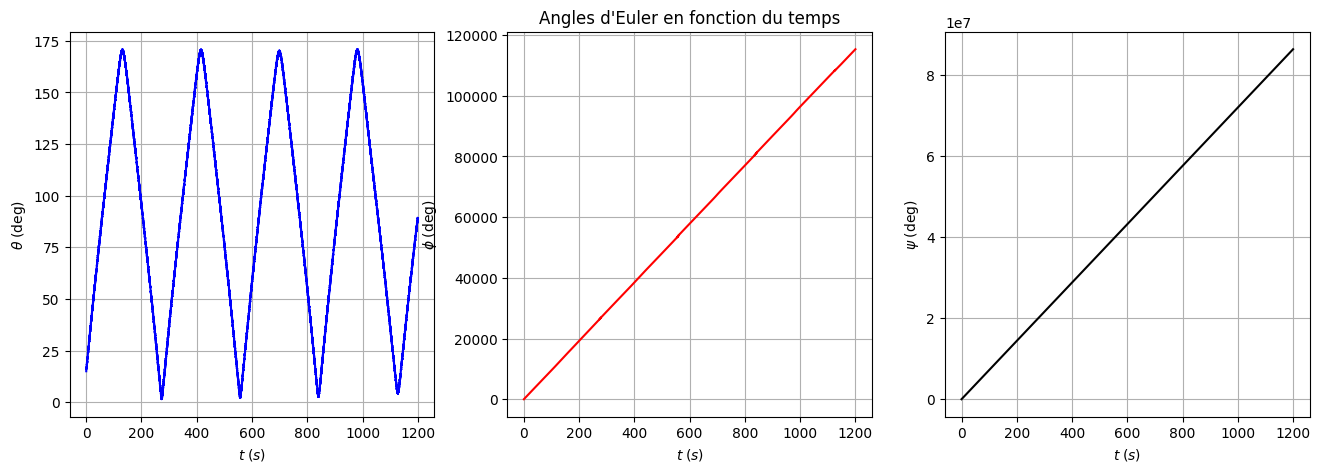

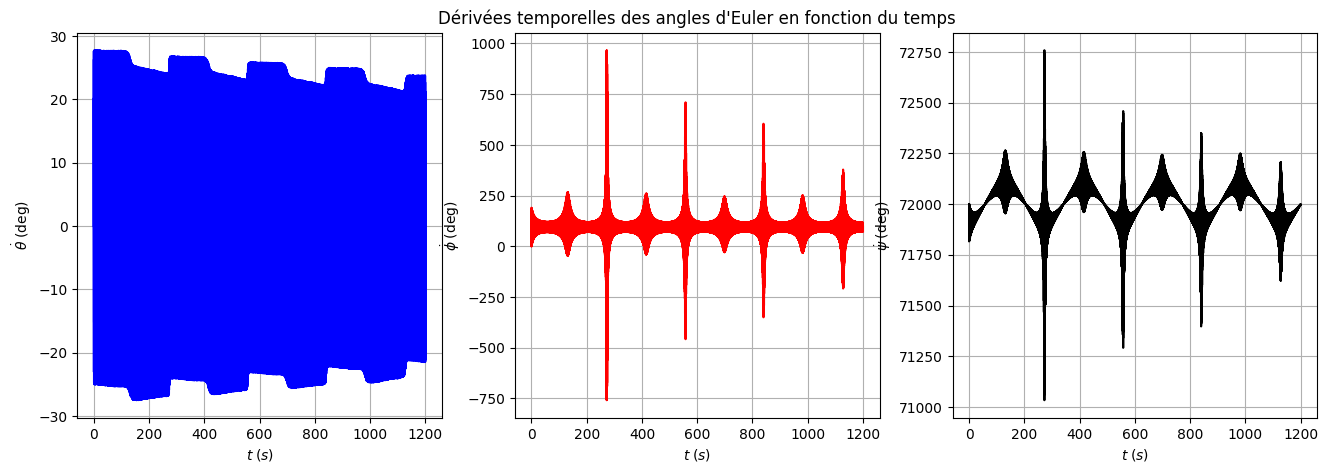

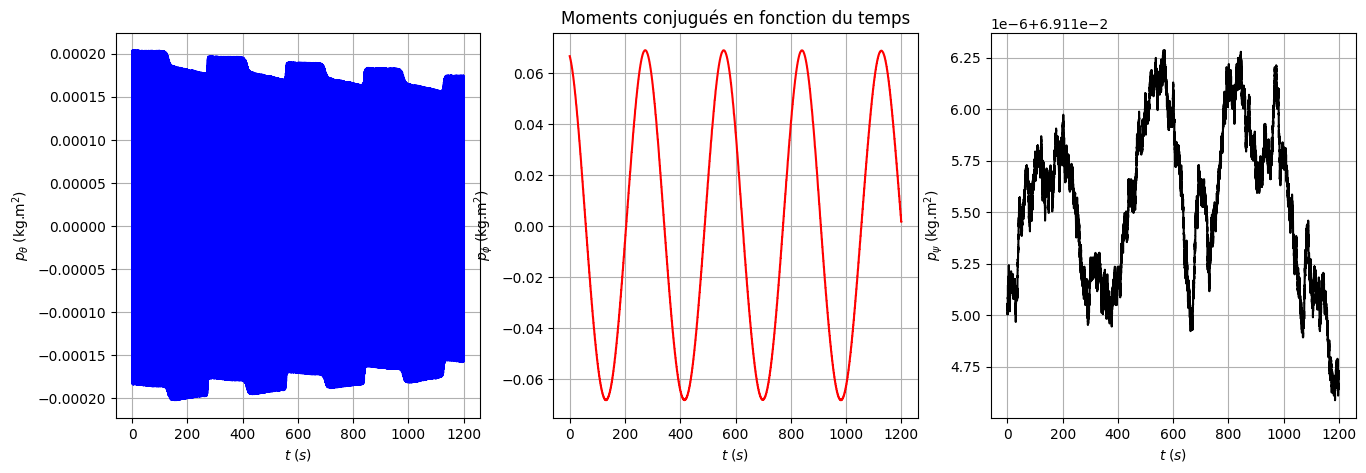

In [14]:
tspan = (0., 1200.)

t, the, the_d, phi, phi_d, psi, psi_d = Gyro_Solver(tspan, CI, params, forcing='X', precision='HIGH')


p_the, p_phi, p_psi = Conjugated_Momentums(the, phi, psi, the_d, phi_d, psi_d, params)

Plot_Gyro_Angles(t, the, phi, psi)

Plot_Gyro_Speed_Angles(t, the_d, phi_d, psi_d)

Plot_Gyro_Momentum(t, p_the, p_phi, p_psi)

In [15]:
### Pour visualiser la trajectoire

#Get_Path(t, the, phi, psi)

$\;$ 

On peux faire plusieurs observations :

$\;$


* On conserve la constance de $p_\psi$ (fluctuations relatives de l'ordre de $10^{-4}$ dans la limite de la précision numérique), et on perd la constance de $p_\varphi$ comme attendu.

Comme nous l'avons vu dans le rapport, en vertu des équations d'Hamilton :


$$ \dot{p}_\varphi = -\dfrac{\partial \mathcal{H}_X}{\partial \varphi} = mhx_0 \omega^2 \cos(\omega t + \Phi) \cos(\varphi) \sin(\theta) = \dfrac{1}{2} mhx_0 \omega^2\left[ \cos(\omega t + \Phi - \varphi) + \cos(\omega t + \Phi + \varphi)  \right] \sin(\theta)  $$


En moyennant sur une période de $\theta$ notée $\dfrac{2\pi}{\Omega_R^X} \gg \dfrac{2\pi}{\omega_L}$ et en se plaçant au voisinage de la résonance $\omega \approx \omega_L$ $ \quad \Longrightarrow \quad $ $ \varphi \approx \omega_L \cdot t, \quad \theta \approx \Omega_R^X \cdot t + \theta_0$ on aura :

$$ \left<  \dot{p}_\varphi \right> \approx \dfrac{1}{2} mhx_0 \omega_L^2 \cos(\Phi) \sin(\theta) \approx \dfrac{1}{2} mhx_0 \omega_L^2 \cos(\Phi) \sin\left(\Omega_R^X \cdot t + \theta_0 \right)  $$

Soit :

$$ \left<  p_\varphi \right> \underset{\delta \to 0}{\approx} -  \dfrac{mhx_0 \omega_L^2}{2 \Omega_R^X} \cos(\Phi) \cos(\theta)   $$


$\;$

Pulsation de Larmor théorique = 1.6611465851580176
Pulsation de Larmor numérique = 1.68141 +/- 0.0


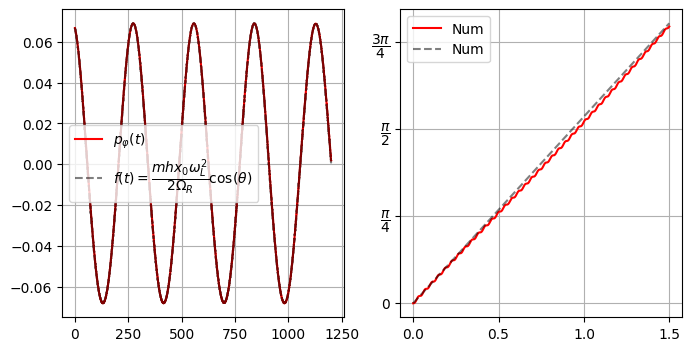

In [16]:
p_phi_th, label_th = Verif_momentum_varphi_forced(t, the, p_phi, omega_R_th, params, forcing='X')

plt.figure(figsize=[8,4])

plt.subplot(1, 2, 1)
plt.plot(t, p_phi, 'r', label=r'$p_\varphi(t)$')
plt.plot(t, p_phi_th, 'k--', label=label_th, alpha=0.5)
plt.legend()
plt.grid()

omega_L_num_X, sigma_X = np.round(Get_Larmor_Freq(t, phi, omega_L_th, full_output='False'), 5)
print('Pulsation de Larmor théorique =', omega_L_th)
print('Pulsation de Larmor numérique =', omega_L_num_X, '+/-', sigma_X)

bool_X_plot = t <= 1.5




plt.subplot(1, 2, 2)
plt.plot(t[bool_X_plot], phi[bool_X_plot], 'r', label='Num')
plt.plot(t[bool_X_plot], AngleRef(t[bool_X_plot], omega_L_num_X, 0), 'k--', alpha=0.5, label='Num')
plt.legend()
plt.grid()
plt.yticks([0, np.pi / 4, np.pi / 2, 3 * np.pi / 4], 
           [r'$0$', r'$\dfrac{\pi}{4}$', r'$\dfrac{\pi}{2}$', r'$\dfrac{3\pi}{4}$'])



plt.show()

$\;$

On retrouve bien cette relation dans ce cas. Après d'autres tests, on retrouve à chaque fois la bonne dépendance de $p_\varphi$ en changeant les paramètres du forçage et du gyroscope. 

On retrouve ainsi un résultat théorique avec notre implémentation numérique, nous assurent donc de sa cohérence.

$\;$

* On retrouve encore une fois la bonne expression de la pulsation de Larmor $\Omega_L = \frac{mgh}{p_\psi}$


$\;$

Revenons aux observations générales

$\;$

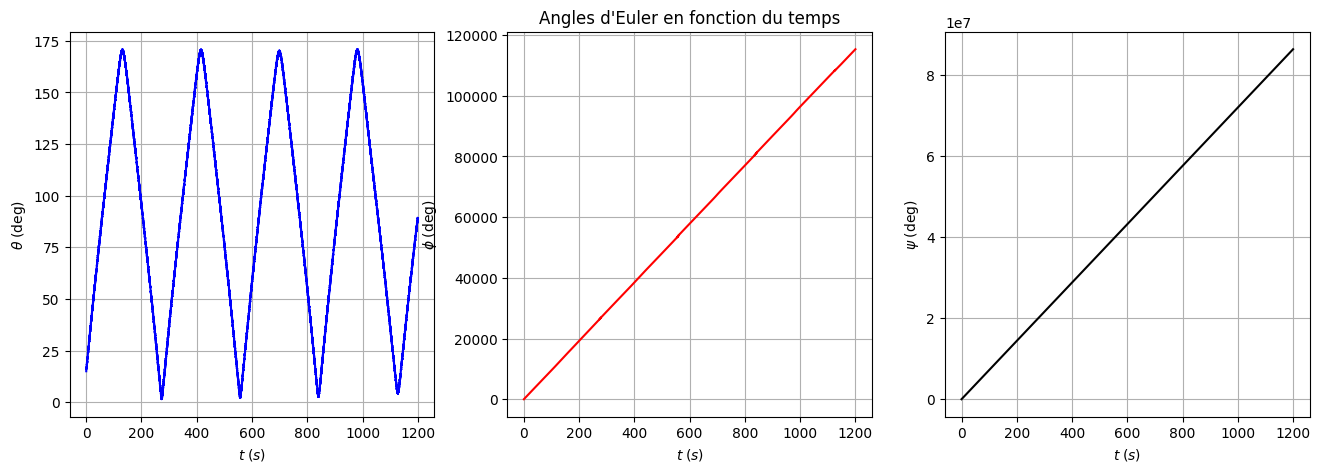

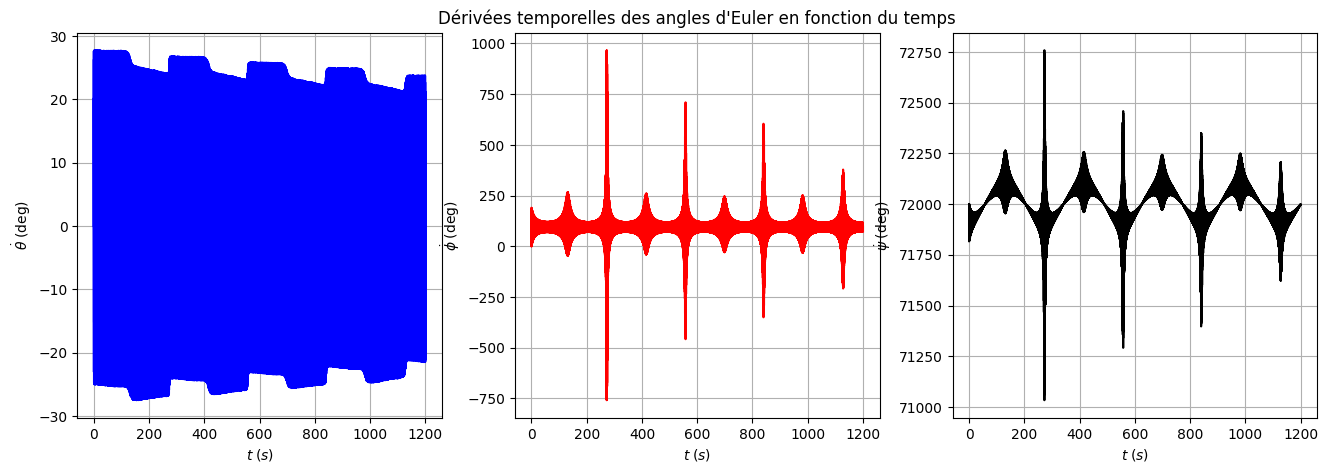

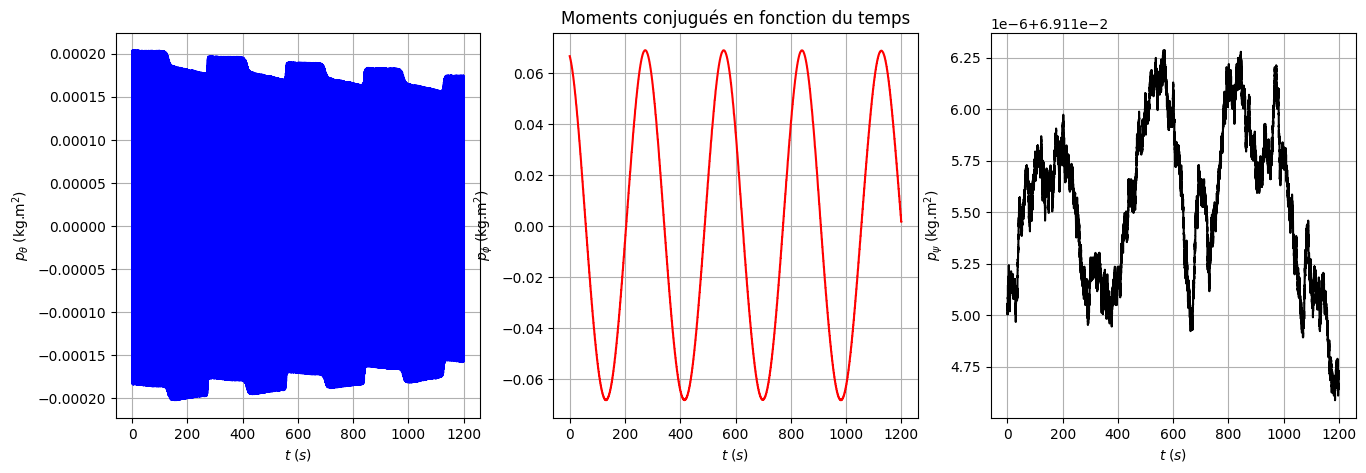

In [17]:
Plot_Gyro_Angles(t, the, phi, psi)

Plot_Gyro_Speed_Angles(t, the_d, phi_d, psi_d)

Plot_Gyro_Momentum(t, p_the, p_phi, p_psi)



$\;$

* On observe bien des **oscillations de Rabi**, la colatitude $\theta(t)$ varie avec le temps et le gyroscope balaye la sphère de Bloch. Néanmoins $\max(\theta) \approx 175^\circ$, cela est dû au fait que l'on excite pas le gyroscope pile à sa pulsation de Larmor à cause des erreurs numériques.

* Étant donné la définition de nos coordonnées, il y a singularité des équations du mouvement au pôles de la sphère de Bloch ($\theta = 0$ et $\theta = \pi$), on observe ainsi que la colatitude $\theta(t)$ varie en dents de scie linéaires $\left( \theta = \pm \Omega_R \cdot  t \right)$ en fonction du temps au lieu de varier linéairement comme on s'y attendrais. De plus, les vitesses angulaires $\dot{\varphi}$ et $\dot{\psi}$ **divergent** aux instants où le gyroscope atteint les pôles avant de rebrousser chemin.

* En faisant abstraction de la nutation (responsable d'oscillation très rapides), la vitesse angulaire $\dot{\theta}$ semble décrire des créneaux d'amplitude $\Omega_R^X$ en fonction du temps, d'où le mouvement en dents de scie de la colatitude $\theta$.

$\;$


**Remarque :**

L'atténuation de l'amplutide des points de divergence des vitesses $\dot{\varphi}$ et $\dot{\psi}$, **mais surtout** l'atténuation de l'amplitude de $\dot{\theta}$ en fonction du temps sont dues à l'implémentation numérique. En effet, le Solver que l'on utilise tend à "lisser" les solutions plus le temps d'intégration est grand, ce "lissage" est nécessaire car il très coûteux de maintenir une telle précision sur un grand temps d'intégration sur de longues durées. De plus,dans le régime forcé le Solver rencontre plus de difficultés lorsque le gyroscope arrive aux pôles de la sphère de Bloch ($\theta \to 0$ et $\theta \to \pi$), qui sont des points de singularité de l'équation différentielle.




$\;$


### III.2 Lissage, stabilité numérique et suppression de la Nutation :



Un résultat de la remarque précédente est qu'il est impossible dans le régime forcé d'avoir un résolution numérique qui n'atténuait pas la nutation aucours du temps. Si l'on fixe les paramètres de tolérance (absolues et relatives) de sorte à forcer le Solver à conserver la Nutation, les solutions seront fortement instables au voisinage des pôles au point de forcer le Solver à utiliser un pas de temps inférieur à la précision numérique minimale $\epsilon$ (*floating point zero*). 

Par exemple modifions le temps d'intégration de la cellule précédente à $t=1500\mathrm{s}$ :


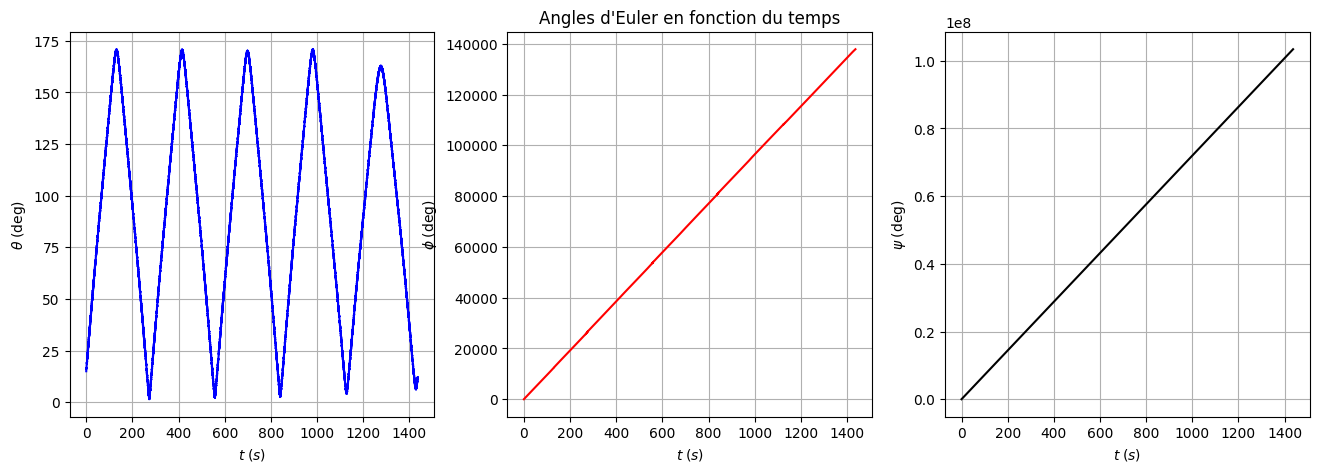

┌ Warning: At t=1436.5663, dt was forced below floating point epsilon 0.00012207031, and step error estimate = 1.1018695. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float32).
└ @ SciMLBase ~/.julia/packages/SciMLBase/sakPO/src/integrator_interface.jl:633


In [18]:
tspan = (0., 1500.)

t, the, the_d, phi, phi_d, psi, psi_d = Gyro_Solver(tspan, CI, params, forcing='X', precision='HIGH')


Plot_Gyro_Angles(t, the, phi, psi)

$\;$

À l'instant $t\approx 1204.8 \mathrm{s}$, le Solver sature et arrête prématurément l'intégration numérique.

De même en modifiant les paramètres du forçage $(x_0, \omega, \Phi)$, l'intant de saturation peux baisser jusqu'à $t=200\mathrm{s}$.



$\;$


Pour nous affranchir de ce problème, nous allons modifier les tolérances du Solver pour le forcer à lisser suffisamment rapidement les solutions tout en conservant les oscillations de Rabi ainsi que la constance de $p_\psi$, au prix seulement de "supprimer" la Nutation qui de tout façon n'étais pas visible à l'oeil dans notre régime. Après plusieurs test, l'optimum semble être toujours avec le Solver `RadauIIA5` avec les paramètres suivants :
- Tolérance absolue `abstol`$= 10^{-6}$
- Tolérance relative `reltol`$ = 10^{-13}$
- Nombre d'itérations maximal `maxiters`$= + \infty$

Pour utiliser cette configuration, il suffit de préciser l'argument `precision='LOW'` dans la fonction `Gyro_Solver`.



$\;$

Après plusieurs test avec différents paramètres, le temps que mets le Solver à "lisser" les solutions est de l'ordre de $\tau \sim 5\mathrm{s} \;$, et le moment $p_\psi$ est toujours conservée (en réalité sa valeur fluctue avec des fluctuations relatives de l'ordre de $10^{-4}$).


Enfin, nous nous sommes assurés que les solutions avec et sans Nutation sont en accord (allures, fréquences de Rabi en variant les paramètres du gyroscope et du forçage).


$\;$





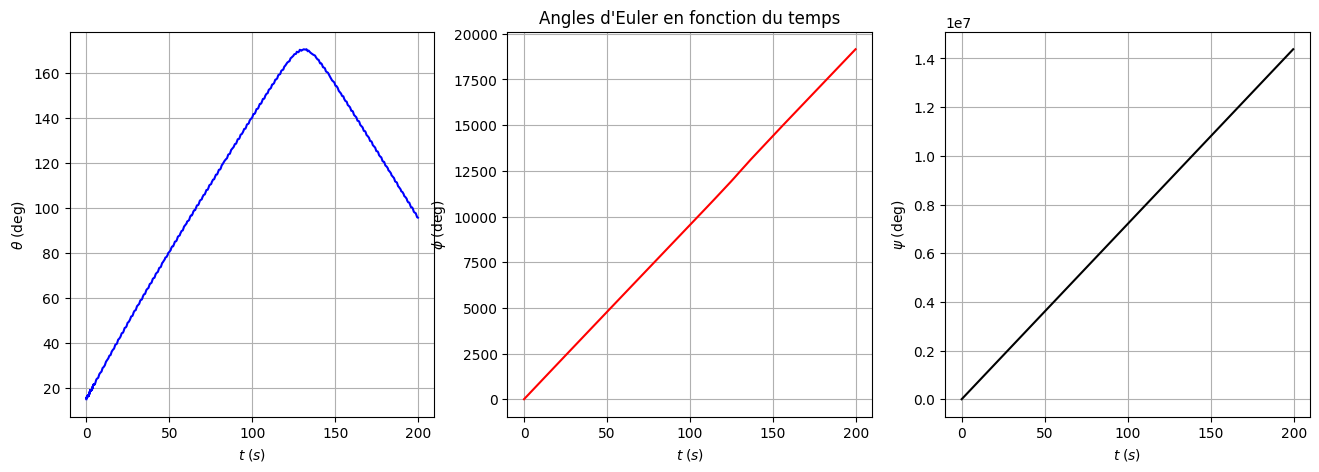

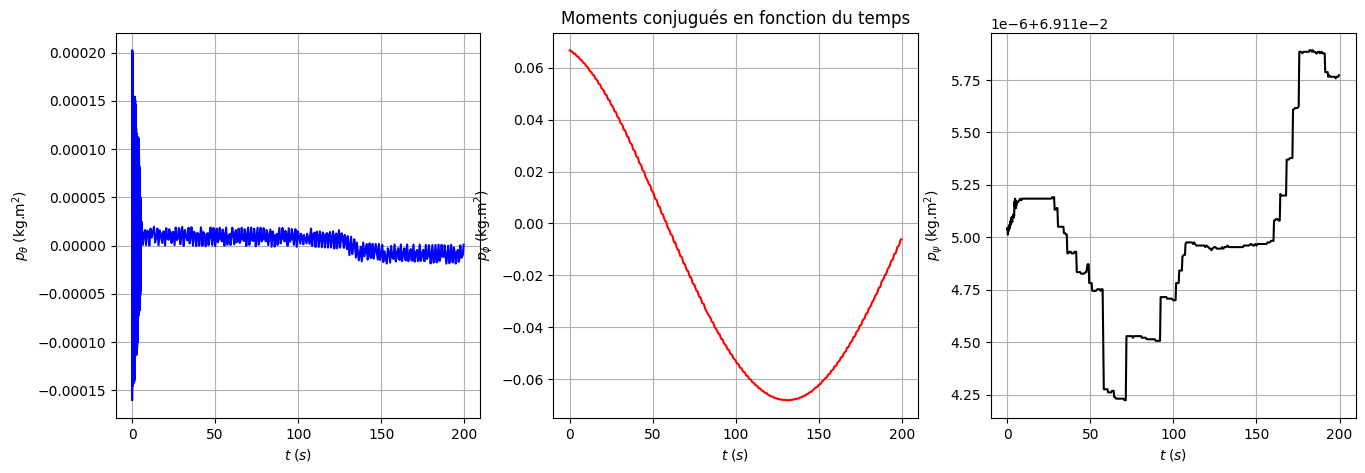

In [19]:
tspan = (0., 1200.)

t, the, the_d, phi, phi_d, psi, psi_d = Gyro_Solver(tspan, CI, params, forcing='X', precision='LOW')

tab_bool_plot = t <= 200

p_the, p_phi, p_psi = Conjugated_Momentums(the, phi, psi, the_d, phi_d, psi_d, params)


Plot_Gyro_Angles(t[tab_bool_plot], the[tab_bool_plot], phi[tab_bool_plot], psi[tab_bool_plot])

Plot_Gyro_Momentum(t[tab_bool_plot], p_the[tab_bool_plot], p_phi[tab_bool_plot], p_psi[tab_bool_plot])

$\;$

### III.3 Expression de la fréquence de Rabi à résonance :

À fin de justifier que l'on obtient bel et bien des oscillation de Rabi, il faut vérifier si l'on retrouve numériquement l'expression de la pulsation de Rabi donné par :

$$ \Omega_R^X(\delta = 0) = - \dfrac{1}{2}\cos(\Phi) \dfrac{mh x_0 \omega_L^2}{p_\psi} = -\dfrac{1}{2} \cos(\Phi) \dfrac{x_0 \omega_L^3}{g} $$

Étant donné que l'ensemble des paramètres caractéristiques du Gyroscope sont constantes ou fixées par l'expérience, nous nous attarderons uniquement sur la contribution des paramètres du *Drive* $(\omega, x_0, \Phi)$; autrement dit sur la dépendance de $Omega_R^X$ en fonction de $x_0$ ainsi que l'effet du déphasage $\Phi$ sur le mouvement.


Nous nous plaçons toujours à résonance $\omega = \omega_L$, nous verrons plus loin le dépendance de $\dot{\theta}$ en fonction de la pulsation Drive $\omega$ dans le cas général.

$\;$


##### III.3.a Variation de la fréquence de Rabi avec $x_0$ :

Pour extraire la fréquence de Rabi, on ajuste la fonction $\cos(\theta)$ à une sinusoïde modèle $y_m = y_0\cos(\omega_m t + \Phi_m)$

En effet, grâce à la parité du cosinus, nous n'avons plus à nous soucier du fait que $\theta(t)$ varie en dents de scie plutôt que linéairement en fonction du temps.


$\;$

La cellule ci dessous nous renvoie les paramètres ajustés $(\omega_m, y_0, \Phi_m)$ ainsi que les incertitudes numériques associées (qui sont prises égales au écarts-types donnés par la matrice de covariance estimée).   

$\;$



Paramètres ajustés : [0.02212834 0.98531735 0.24631118]
Incertitudes associées : [2.49039248e-06 7.81285134e-04 1.69758674e-03] 



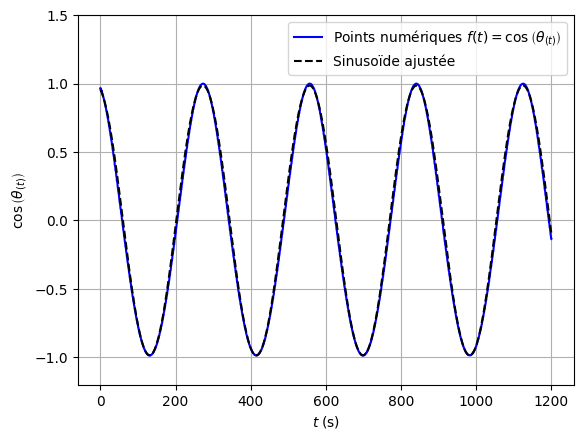

Pulsation Rabi donnée par l'ajustement : 0.02212834 +/- 2.49e-06
Pulsation Rabi théorique : 0.02341496


In [20]:
params_hint = [omega_R_th, 1, CI[0]]

params_fit, tab_incertitudes = Get_Rabi_Freq(t, the, params_hint, full_output='True')

print("Paramètres ajustés :", params_fit)
print("Incertitudes associées :", tab_incertitudes, '\n')

plt.figure()
plt.plot(t, np.cos(the), 'b', label=r'Points numériques $f(t) = \cos\left( \theta_{(t)} \right)$')
plt.plot(t, Sinusoide(t, *params_fit), 'k--', label='Sinusoïde ajustée')
plt.grid()
plt.legend()
plt.ylim([-1.2, 1.5])
plt.xlabel(r'$t \; (\mathrm{s})$')
plt.ylabel(r'$\cos\left( \theta_{(t)} \right)$')

plt.show()

omega_R_fit = params_fit[0]
incer_omega_R_fit = tab_incertitudes[0]


print("Pulsation Rabi donnée par l'ajustement :", np.round(omega_R_fit, 8), '+/-', np.round(incer_omega_R_fit, 8))
print("Pulsation Rabi théorique :", np.round(omega_R_th, 8))


$\;$

Ainsi, pour ce premier jeu de paramètres on retrouve la bonne expression de la pulsation Rabi à résonance. 
Vérifions à présent la dépendance de $\Omega_R^X(\delta = 0)$ vis-à-vis de $x_0$.

$\;$

In [21]:
# NON On se contente d'intégrer sur une seule période
tspan = (0., 1200.)

tab_x0 = np.linspace(5, 30, 11, endpoint=True) * 1e-2   # amplitude en m
tab_Omega_R = Rabi_Pulsation_Amplitude_Dependency(tab_x0, tspan, CI, params, forcing='X')


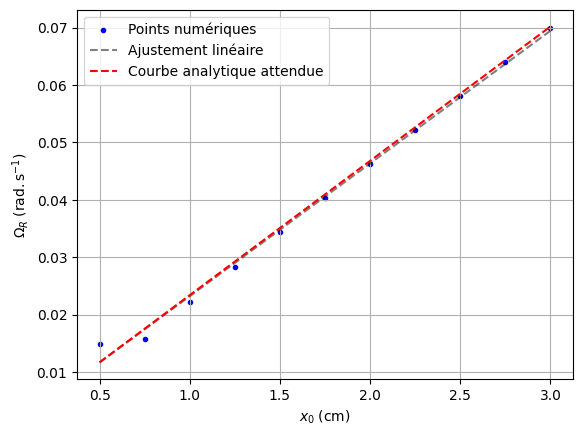

In [22]:
coeff_direct, ord_origine = np.polyfit(tab_x0, tab_Omega_R, 1)

tab_x_plot = np.linspace(tab_x0[0], tab_x0[-1], 1000, endpoint=True)

plt.figure()

plt.scatter(tab_x0 * 10, tab_Omega_R, marker='.', color='b', label='Points numériques')
plt.plot(tab_x_plot * 10, coeff_direct *  tab_x_plot + ord_origine, 'k--', label='Ajustement linéaire', alpha=0.5)


p_psi0 = p_psi_exp(params, CI)

tab_Omega_R_analytique = - 0.5 * np.cos(Phi) * m * h * tab_x_plot * (omega_L_th**2) / p_psi0



plt.plot(tab_x_plot * 10, tab_Omega_R_analytique, 'r--', label='Courbe analytique attendue')

plt.xlabel(r'$x_0 \; (\mathrm{cm})$')
plt.ylabel(r'$\Omega_R \; (\mathrm{rad.s}^{-1})$')


plt.legend()
plt.grid()

plt.show()

$\;$

*In-fine*, on obtient bien la relation linéaire attendue dans le cas $\Phi = \pi$.

$\;$


##### III.3.b Influence du déphasage $\Phi$ :

Passsons maintenant à l'étude de l'influence du déphasage $\Phi$ sur la pulsation de Rabi à résonance. 


On prendra pour ce calcul $\; x_0 = 15 \; \mathrm{cm} \;$ et $\; \theta_{(t=0)} = \dfrac{\pi}{4}$ .

$\;$




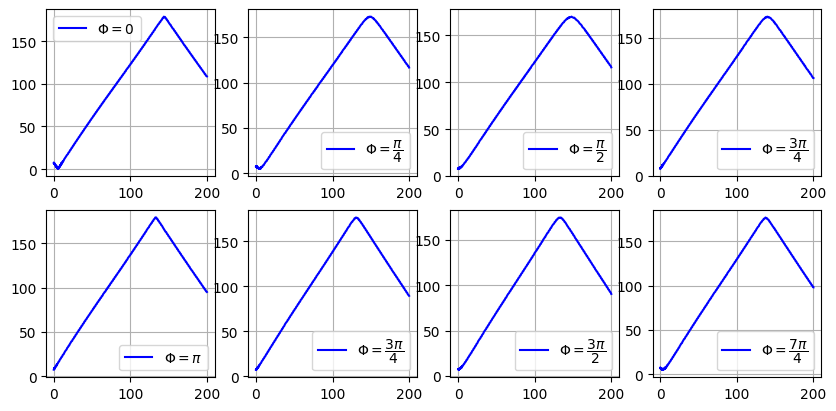

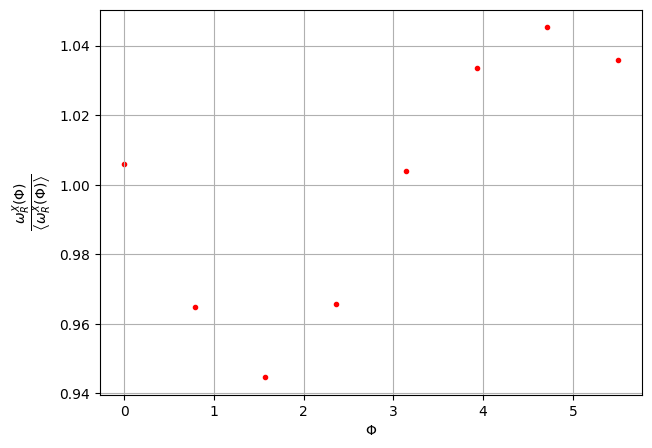

In [23]:
x0 =  0.1              # m
omega_exc = 1.663      # Hertz
Phi = 0

params = [g, m, h, J1, J3 , x0, Phi, omega_exc]
CI = [np.pi / 24, 0, 0, 0, 0, 2 * np.pi * 200]

tspan = (0., 200.)

tab_Phi = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4, np.pi, 5 * np.pi / 4 ,3 * np.pi / 2, 7 * np.pi / 4]
list_label = [r'$\Phi = 0$', r'$\Phi = \dfrac{\pi}{4}$', r'$\Phi = \dfrac{\pi}{2}$', 
              r'$\Phi = \dfrac{3\pi}{4}$', r'$\Phi = \pi$', r'$\Phi = \dfrac{3\pi}{4}$', 
              r'$\Phi = \dfrac{3\pi}{2}$', r'$\Phi = \dfrac{7\pi}{4}$']


plt.figure(figsize=[10, 10])

new_omega_R = []

params_hint = [omega_R_th, 1, CI[0]]

for k in range(len(tab_Phi)):
    params[-2] = tab_Phi[k]
    t, the, _, _, _, _, _ = Gyro_Solver(tspan, CI, params, forcing='X', precision='LOW')
    plt.subplot(4, 4, k+1)
    plt.plot(t, the * 180 / np.pi, 'b', label=list_label[k])
    plt.grid()
    plt.legend()
    new_omega_R.append(Get_Rabi_Freq(t, the, params_hint, full_output='False')[0])
    #print('Cas', list_label[k], ' | Pulsation Rabi estimée :', np.round(new_omega_R[k], 4))

plt.show()

print("\n")

plt.figure(figsize=[7,5])
plt.scatter(tab_Phi, new_omega_R / np.mean(new_omega_R), marker='.', color='r')
plt.xlabel(r'$\Phi$')
plt.ylabel(r'$ \dfrac{\omega_R^X(\Phi)}{ \left < \omega_R^X(\Phi)  \right > } $')
plt.grid()
plt.show()




$\;$

**Remarques :**

* La pulsation Rabi ne varie pas en $\cos(\Phi)$, elle semble prendre une expression plus complexe de la forme :

$$ \Omega_R^X(\Phi) \approx \left[ 1 + f\left( \theta_{(t=0)} \right) \sin \left( \alpha \Phi + \beta \right)  \right] \cdot \Omega_R^0 $$


Où $f$, $\alpha$ et $\beta$ sont des fonctions de l'angle intial $\theta_{(t=0)}$. Il est remarquable que ces paramètres ne dépendent pas du régime de nutation. 

Par exemple dans le cas illustré ci-dessus, la fréquence de Rabi présente une fluctuation relative de l'ordre de $6\%$, en jouant sur $x_0$ on peut arriver à une fluctuation relative de $15\%$.


En jouant sur les paramètres, on constate que $f \to 0$ lorsque $\theta_{(t=0)} \to 0$ ce qui est la condition expérimentale. Ainsi si l'on lance le gyroscope depuis une position quasi-verticale, on pourra nous affranchir de cette complexité en ayant $\Omega_R^X(\Phi) \approx \mathrm{cste}$.

* L'amplitude maximale de la colatitude $\mathrm{\max}(\theta)$ dépend également du déphasage $\Phi$, cette amplitude est maximale pour $\Phi = 0  $ et $\Phi = \pi$.

* Les sens du mouvement (donné par le signe de $\Omega_R^X(t=0)$) dépend comme attentdu du signe de $\cos(\Phi)$, et avec le bonne convention de signe.

$\;$


$\;$ 


Tous ces éléments nous permettent de tirer quelques conclusions.

L'expression de la pulsation de Rabi que l'on a dérivé est strictement valable uniquement pour $\Phi = 0$ et $\Phi = \pi$, nous suggérons 2 principales causes :
 
1. La composante du moment de la pseudo-force d'entraînement selon $\vec{u}_\theta$ est (en partie) responsable de cet écart en modifiant la fréquence de Larmor, étant donnée que nous l'avons négligé pour déterminer la pulsation Rabi et qu'elle varie en valeur moyenne en $\sin(\omega t + \Phi - \varphi)$, un autre moyen de le voir est de visualiser sur une animation la direction et la norme du moment de la pseudo-force d'entrainement à résonance $\delta \to 0$ en prenant différentes valeurs de $\Phi$.


2. En faisant l'approximation gyroscopique nous avons négligé des termes certes très faibles (devant le terme considéré), mais dont la derivée temporelle est grande et qui donc devraient intervenir dans le théorème du moment cinétique. 


Tout compte fait, nous pouvons nous affranchir de toutes ces complications en **nous restreignants aux cas** $\Phi = 0$ et $\Phi = \pi$, et en lâchant le gyroscope depuis une position quasi-verticale à $t=0$. L'expression établie précédemment se réecrit donc :

$$ \boxed{ \; \Omega_R^X = -\dfrac{1}{2} \cdot sg\left[ \cos(\Phi) \right] \cdot \dfrac{mhx_0 \omega_L^2}{p_\psi} \; } $$


Où $sg$ est la fonction *signe*. Où de manière équivalente :


$$\boxed{ \; \vert \Omega_R^X \vert = \dfrac{1}{2} \cdot  \dfrac{mhx_0 \omega_L^2}{p_\psi} \; } $$


Satisfaire la condition $\Phi=0$ ou $\Phi$ est aisément réalisable expérimentalement en commandant le moteur qui entraîne le plateau.


On retiendra que lorsque $\Phi = 0$, **le gyroscope se dirigera vers le pôle Nord de la sphère de Bloch, et lorsque $\Phi=\pi$ il se dirigera vers le pôle Sud.**


$\;$


$\;$


En conclusion, dans les conditions expérimentales notre implémentation numérique est bien en accord avec nos résultats théoriques, le gyroscope décrira bien des **oscillations de Rabi de manière analogue à un spin $\frac{1}{2}$**.


$\;$


$\;$


### III.4 Termes de l'Hamiltonien :


L'Hamiltonien s'écrit dans le régime forcé :

$$ \mathcal{H}_X = \mathcal{H}_\text{libre} + E_{\text{ex}, X} =  \mathcal{H}_{\text{libre}} + m {\vec{a}^X_{\text{ent}}} \cdot \vec{r} $$


Où :
* $\mathcal{H}_\text{libre} = \mathcal{T}_\theta + \mathcal{T}_\psi + \mathcal{N} + mgh\cos(\theta) $ est l'Hamiltonien dans le régime libre.

* $ E_{\text{ex}, X} = mhx_0 \omega^2 \cos(\omega t + \Phi) \sin(\varphi) \sin(\theta) \;$ correspond à l'énergie potentielle due au forçage.

$\;$


Comparons les termes de l'Hamiltonien :

$\;$

In [24]:
x0 =  0.1         # m
Phi = np.pi

omega_L_th, omega_R_th = Compute_Carac_Pulsations(params, CI)

omega_exc = omega_L_th      # PULSATION DE LARMOR - Résonance

params = [g, m, h, J1, J3 , x0, Phi, omega_exc]
CI = [np.pi / 24, 0, 0, 0, 0, 2 * np.pi * 200]


tspan = (0., 1200.)

t, the, the_d, phi, phi_d, psi, psi_d = Gyro_Solver(tspan, CI, params, forcing='X', precision='HIGH')


p_the, p_phi, p_psi = Conjugated_Momentums(the, phi, psi, the_d, phi_d, psi_d, params)

#Plot_Gyro_Angles(t, the, phi, psi)

#Plot_Gyro_Speed_Angles(t, the_d, phi_d, psi_d)

#Plot_Gyro_Momentum(t, p_the, p_phi, p_psi)


/Users/bradaizakaria/Documents/venvL3/envL3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


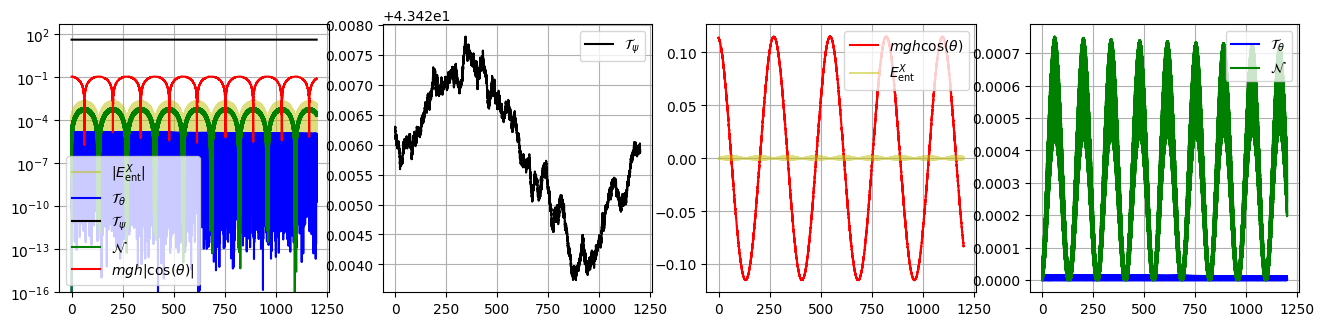

In [25]:
Ec_theta, Ec_psi, Nutation, Epp, E_ext = Hamiltonian_Terms(t, the, phi, psi, the_d, phi_d, psi_d, params, forcing='X')

E_tot = Ec_theta + Ec_psi + Nutation + Epp + E_ext

plt.figure(figsize=[16, 16])

plt.subplot(4, 4, 1)
plt.plot(t, np.abs(E_ext), label=r'$\vert E^X_\text{ent} \vert $', color='y', alpha=0.5)

plt.plot(t, Ec_theta, label=r'$ \mathcal{T}_\theta$', color='b')
plt.plot(t, Ec_psi, label=r'$ \mathcal{T}_\psi$', color='k')
plt.plot(t, Nutation, label=r'$ \mathcal{N}$', color='g')
plt.plot(t, np.abs(Epp), label=r'$ mgh \vert \cos(\theta) \vert$', color='r')
plt.grid()
plt.yscale('log')
plt.ylim([10e-17, 500])
plt.legend()


plt.subplot(4, 4, 2)
plt.plot(t, Ec_psi, label=r'$ \mathcal{T}_\psi$', color='k')
plt.grid()
plt.legend()


plt.subplot(4, 4, 3)
plt.plot(t, Epp, label=r'$ mgh\cos(\theta)$', color='r')
plt.plot(t, E_ext, label=r'$ E^X_\text{ent}$', color='y', alpha=0.5)

plt.grid()
plt.legend()


plt.subplot(4, 4, 4)
plt.plot(t, Ec_theta, label=r'$ \mathcal{T}_\theta$', color='b')
plt.plot(t, Nutation, label=r'$ \mathcal{N}$', color='g')
plt.grid()
plt.legend()

plt.show()




$\;$

* On retrouve encore une fois les bonnes relations entre les ordres de grandeur des termes énergétiques :

$$ \mathcal{T}_\psi \; \gg \; mgh\cos(\theta), \; E^X_\text{ent} \; \gg \; \mathcal{N} \; \gg \; \mathcal{T}_\theta $$

$\;$

* De même que précédemment on déduit que $\mathcal{H}_X \approx \mathcal{T}_\psi$, $\; \mathcal{T}_\psi \approx \mathrm{cste} $ et $\mathcal{T}_\theta \approx 0 $ par comparaison des ordres de grandeur et des fluctuations relatives (de l'ordre $10^{-4}$ pour $\mathcal{T}_\psi$).

$\;$

* De même, le terme causant la nutation $\mathcal{N}$ varie avec une amplitude de l'ordre $ \mathrm{max}(\mathcal{N}) \approx 10^{-4} \mathrm{J} $, soit $\dfrac{\mathrm{max}(\mathcal{N})}{mgh} \approx 10^{-3}$.

De plus, $\mathcal{N}$ ne devient comparable aux termes $mgh\cos(\theta)$ et $E^X_\text{ent}$ que sur de très courtes périodes (de moins d'$1\mathrm{s}$). 
Tout compte fait, on peux encore une fois considérer que $\mathcal{N} \approx \mathrm{cste}$.


Encore une fois, on retombe dans **l'approximation gyroscopique** qui est telle que $\mathcal{T}_\theta \approx 0$ et $\mathcal{N} \approx \mathrm{cste} \ll mgh\cos(\theta), \; E^X_\mathrm{ent} \ll \mathcal{T}_\psi$

$\;$

* Enfin, le plus notable est que l'énergie pontientielle due au forçage est du même ordre de grandeur que l'énergie potentielle de pesanteur $\; mgh\cos(\theta) \sim E^X_\text{ent} \;$

Cette relation conduit à des résultats importants qui font l'objet du paragraphe prochain.


$\;$




### III.5 Moments des forces :




$\;$

On note $\beta^\prime = \left( \vec{u}_\theta, \vec{u}_\varphi, \vec{u}_\psi \right)$ les vecteurs normées associées aux rotations des angles d'Euler, ils sont donnés dans la base cartésienne $\beta = \left( \vec{e}_x, \vec{e}_y, \vec{e}_z \right)$ par :

$$\left\{  \begin{array}{r c l} 
\vec{u}_\theta & = & \left[ \cos(\varphi), \; \sin(\varphi), \; 0 \right]_\beta = \vec{u}_\rho \\
\vec{u}_\varphi & = & \left[ 0, \; 0, \; 1 \right]_\beta = \vec{u}_z  \\
\vec{u}_\psi & = & \left[ \sin(\theta)\sin(\varphi), \; -\sin(\theta) \cos(\varphi), \; \cos(\theta) \right]_\beta
\end{array} \right .   $$

Dans son référentiel propre, le gyroscope subit son poids $\vec{P}$ et la pseudo-force d'entraînement $\vec{F}^X_e \; $, cette dernière s'écrit dans le cas du forçage $X$ :

$$ \vec{F}^X_e = -m \vec{a}^X_e = mx_0 \omega^2 \cos(\omega t + \Phi) $$ 

Le poids $\vec{P}$ qui donne naissance à la précession exerce un moment que l'on note $\Gamma(\vec{P})$ donné par :

$$ \vec{\Gamma}(\vec{P}) = mgh\sin(\theta) \vec{u}_\theta $$


Le moment de la pseudo-force d'entraînement quant à lui a 2 termes dans la base $\beta^\prime$ :


$$ \vec{\Gamma}(\vec{F}^X_e) = mhx_0 \omega^2 \left[  \cos(\omega t + \Phi)\sin(\varphi) \cos(\theta) \vec{u}_\theta + \cos(\omega t + \Phi) \cos(\varphi) \sin(\theta) \vec{u}_\varphi     \right ] $$
$$ \vec{\Gamma}(\vec{F}^X_e) = mhx_0 \omega^2 \begin{pmatrix} \cos(\omega t + \Phi)\sin(\varphi) \cos(\theta) \\ \cos(\omega t + \Phi) \cos(\varphi) \sin(\theta) \\ 0  \end{pmatrix}_{\beta^\prime}  $$



La composante du moment de la pseudo-force d'entraînement $\vec{\Gamma}(\vec{F}^X_e)$ selon le vecteur $\vec{u}_\varphi$ **est la cause des oscillations de Rabi.**

**Néanmoins,** $ \; \vec{\Gamma}(\vec{F}^X_e)$ admet également un moment selon le vecteur $\vec{u}_\theta$ **ce qui nous indique que la pseudo-force d'entraînement aura** (potentiellement en tout cas) **un effet sur la précession, en particulier sur l'expréssion de la fréquence de Larmor**. Au fur et à mesure des simulations numériques, nous identifierons les potentiels points d'intervention de cette composante "non désirée" (en tout cas absente en Physique Quantique). 

Pour bien saisir la signification de cette composante, c'est comme si l'onde électrmagnétique *de Drive* que l'on envoie sur notre spin $\frac{1}{2}$ n'étais pas purement transverse, et avait un composante longitudinale (de faible amplitude idéalement par rapport au champ longitudinal stationnaire). 



$\;$




Comparons les ordres de grandeurs et les variations de ces composantes :



$\;$

In [26]:
def Momentum_Fe(t, the, phi, psi, params, forcing='X'):
    '''Moment associé à la force centrifuge.'''
    _, m, h, _, _, x0, Phi, omega = params
    match forcing:
        case 'X':
            momentum_the = m*h*x0*(omega**2)*np.cos(omega*t+Phi)* np.sin(phi)*np.cos(the)
            momentum_phi = m*h*x0*(omega**2)*np.cos(omega*t+Phi)* np.cos(phi)*np.sin(the)
        case 'XY':
            momentum_the = - m*h*x0*(omega**2)*np.sin(omega*t+Phi-phi)*np.cos(the)
            momentum_phi = m*h*x0*(omega**2)*np.cos(omega*t+Phi-phi)*np.sin(the)

    return momentum_the, momentum_phi

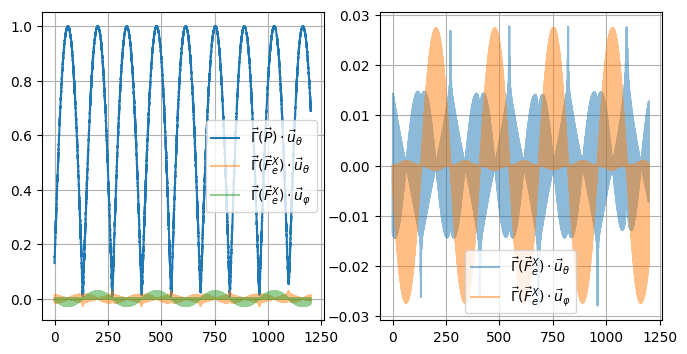

In [27]:
Gamma_P = Momentum_Weight(the, phi, psi, params)
Gamma_Fe_the, Gamma_Fe_phi = Momentum_Fe(t, the, phi, psi, params, forcing='X')

coeff_norm = m*g*h

plt.figure(figsize=[8, 4])

plt.subplot(1, 2, 1)
plt.plot(t, Gamma_P / coeff_norm, label=r'$\vec{\Gamma}(\vec{P}) \cdot \vec{u}_\theta$')
plt.plot(t, Gamma_Fe_the / coeff_norm, label=r'$\vec{\Gamma}(\vec{F}^X_e) \cdot \vec{u}_\theta$', alpha=0.5)
plt.plot(t, Gamma_Fe_phi / coeff_norm, label=r'$\vec{\Gamma}(\vec{F}^X_e) \cdot \vec{u}_\varphi$', alpha=0.5)
plt.legend()
plt.grid()


plt.subplot(1, 2, 2)
plt.plot(t, Gamma_Fe_the / coeff_norm, label=r'$\vec{\Gamma}(\vec{F}^X_e) \cdot \vec{u}_\theta$', alpha=0.5)
plt.plot(t, Gamma_Fe_phi / coeff_norm, label=r'$\vec{\Gamma}(\vec{F}^X_e) \cdot \vec{u}_\varphi$', alpha=0.5)
plt.legend()
plt.grid()



plt.show()


$\;$

Il est remarquable que :


$$  \vert \vec{\Gamma}(\vec{F}^X_e) \vert \ll \vert \vec{\Gamma}(\vec{P}) \vert \qquad \forall t $$


Ainsi, on déduit que **la correction du terme $\vec{\Gamma}(\vec{F}^X_e) \cdot \vec{u}_\theta$ à l'expression de la pulsation de Larmor est négligeable**.

$\;$

Toutefois, on peux s'efforcer d'essayer de caractériser l'effet de cette composante de moment sur la précession. Comme il fut détaillé dans la rapport, en projettant le théorème du moment cinétique selon $\vec{u}_\theta$ puis en moyennant les expressions sur un temps $\tau$ tel que $ \dfrac{2\pi}{\Omega_R^X} \ll T \ll \dfrac{2\pi}{\Omega_L}\;$, on estime à grand renforts de développements limités une *correction* de l'expression de la pulsation de Larmor :


$$ \Omega^{\text{corr}}_L (\delta) = \Omega_L + \delta \mathrm{sinc} \left(\delta \cdot t  \right) $$

Où $\Omega_L = \frac{mgh}{p_\psi}$ est la pulsation de Larmor non corrigée. 

Nous testerons la pertinence de cette expression plus loin, nous nous contenterons de remarquer qu'elle ne modifie pas l'expression de Rabi à résonance ($\delta = 0$ donc $\Omega^{X, \text{corr}}_R = \Omega^X_R$). Étant donné la différence d'ordre de grandeur, les développements limités utilisés pour arriver à cette expression sont en parie justifiés.


$\;$

$\;$


### III.6 *Rotating-frame* et Oscillations de Rabi quantiques  :

$\;$


Cf discussion avec Matthieu, bp ça ne fait pas le tour.



$\;$


$\;$



# VI- Probabilités de mesure et Chevrons de Rabi :



$\;$


Nous avons démontré l'analogie entre le gyroscope et les particules de spin $\frac{1}{2}$ en ayant établi une correspondance directe via la précession de Larmor et les oscillations de Rabi. 

Il reste à poser l'équivalent classique d'une quantité fondamentale : les probabilités de mesure dans les états propres $\ket{0}$ et $\ket{1}$ aux instants $t$ notées $\mathbb{P}\left(\ket{0}, t \right)$ et $\mathbb{P}\left (\ket{1}, t \right)$.

Étant donné que notre analogie se fonde sur le fait que le gyroscope représente un spin $\frac{1}{2}$ dans la sphère de Bloch, on déduit directement l'équivalence :

$$ \mathbb{P}\left (\ket{1}, t \right) = \dfrac{1 + \cos(\theta)}{2} \qquad \qquad \; \qquad \qquad  \mathbb{P}\left (\ket{1}, t \right) = \dfrac{1 - \cos(\theta)}{2} $$



$\;$


Jusqu'à présent, nous nous sommes restreints à exciter le gyroscope à sa fréquence propre de Larmor. Nous allons désormais nous éloigner de la résonance $(\delta \to 0)$ en excitant le système à des *detunings* non nuls $(\delta \ne 0, \; \omega \ne \Omega_L)$ et pendant des durées différentes $\Delta t$. Et ce, dans le but de *cartographiant* la probabilité de mesurer "notre Qubit" dans l'état *up* $\mathbb{P}\left(\ket{0} \right)$ en fonction de *la fréquence $\omega$ et de la durée $\Delta t$ du Drive* (excitation).


$\;$


On prendra des durées allant jusqu'à $\Delta t_\text{max} = 2000\mathrm{s}$ soit environ $530$ périodes de précession et $8$ périodes de Nutation.

On prendre également des pulsations $\omega \in \left[ \dfrac{4}{5} \Omega_L \; ; \; \dfrac{6}{5} \Omega_L   \right]$  


$\;$



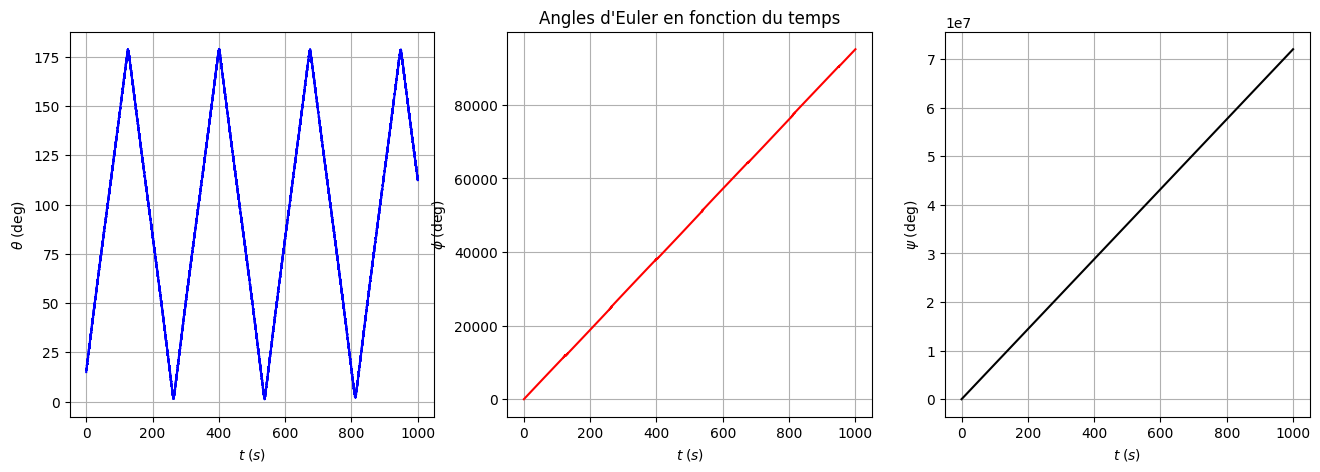

In [28]:
g = 9.81           # m/s^2
m = 0.375          # kg
J3 = 0.000055      # kg.m^2
J1 = 0.000055      # kg.m^2
h = 31.25 * 1e-3   # m
x0 =  0.1         # m
Phi = np.pi

omega_L_th, omega_R_th = Compute_Carac_Pulsations(params, CI)

omega_exc = omega_L_th      # PULSATION DE LARMOR - Résonance

params = [g, m, h, J1, J3 , x0, Phi, omega_exc]
CI = [np.pi / 12, 0, 0, 0, 0, 2 * np.pi * 200]

tspan = (0., 1000.)

t, the, the_d, phi, phi_d, psi, psi_d = Gyro_Solver(tspan, CI, params, forcing='X', precision='HIGH')

p_the, p_phi, p_psi = Conjugated_Momentums(the, phi, psi, the_d, phi_d, psi_d, params)

Plot_Gyro_Angles(t, the, phi, psi)

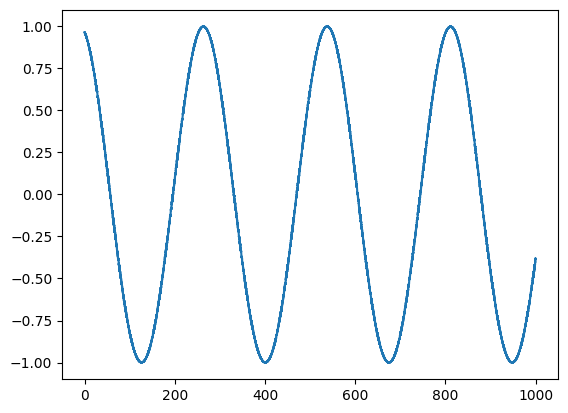

In [29]:
plt.plot(t, np.cos(the))

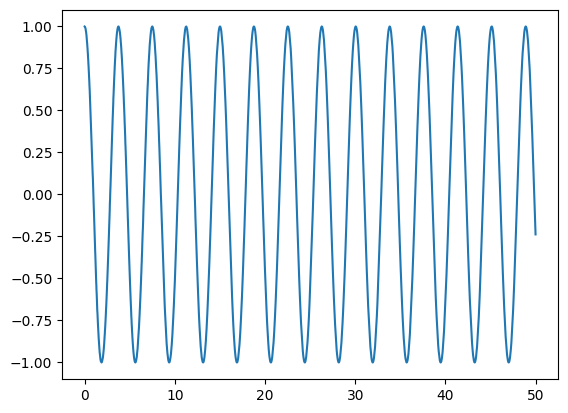

In [30]:
plt.plot(t[t <= 50], np.cos(phi[t <= 50]))

In [31]:
N_points = 51    ### Nombre de points / résolution de la figure

# Tableau des pulsations d'excitation
tab_omega = np.linspace(0.97 * omega_L_th, 1.03 * omega_L_th, N_points, endpoint=True)

tab_delta = tab_omega - omega_L_th   # tableau des detunnings

# Tableau des durées d'excitation
tab_t_burst = np.linspace(0, 500, N_points)

In [32]:
def Rabi_Chevron(tab_exc_pulsation, tab_t_burst,  params, CI, forcing='X', precision='LOW'):
    
    list_the = []
    list_t = []
    tab_theta = np.zeros( (len(tab_exc_pulsation), len(tab_t_burst)) )

    for i in range(len(tab_exc_pulsation)):
        
        params[-1] = tab_exc_pulsation[i]
        
        for j in range(len(tab_t_burst)):
            tspan = (0, tab_t_burst[j])
            t, the, _, _, _, _, _ = Gyro_Solver(tspan, CI, params, forcing=forcing, precision=precision)
            tab_theta[i, j] = the[-1]
            list_the.append(the)
            list_t.append(t)

            
    
    return tab_theta, list_the, list_t
tab_theta, list_the, list_t = Rabi_Chevron(tab_omega, tab_t_burst,  params, CI, forcing='X', precision='LOW')





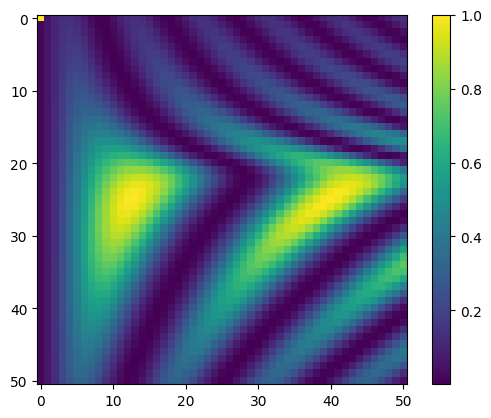

In [33]:
Rabi_num = (1 - np.cos(tab_theta)) / 2

Rabi_num[0, 0] = 1

plt.figure()
plt.imshow( Rabi_num ) 
plt.colorbar()
plt.show()

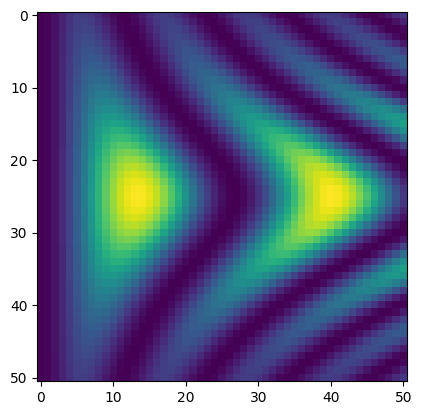

In [34]:
Rabi_IDEAL = Rabi_Ideal(tab_t_burst, tab_delta, omega_R_th)
plt.imshow(Rabi_IDEAL)

In [110]:
def Rabi_Freq_Modified(delta, Omega_R, Omega_L):
    return Omega_R * (1 + delta / Omega_L)**2

def Larmor_Freq_Modified(delta, t_burst, Omega_L):
    return Omega_L + delta * np.sinc(delta * t_burst / np.pi)

def Rabi_Assym(t_burst, delta, Omega_R, Omega_L):
    '''Chevrons de Rabi assymétriques.'''
    tab_Rabi_th = np.zeros((len(delta), len(t_burst)))
    for i in range(len(delta)):
        for j in range(len(t_burst)):
            #Omega_L_mod = Larmor_Freq_Modified(delta[i], t_burst[j], Omega_L)
            #Omega_R_mod = Rabi_Freq_Modified(delta[i], Omega_R, Omega_L)
            Omega_R_mod = Omega_R 
            pulsation =  np.sqrt(delta[i]**2 + Omega_R_mod**2) / 2
            num = (Omega_R_mod**2) * (np.sin( pulsation * t_burst[j] )**2)
            den = Omega_R_mod**2 + delta[i]**2
            tab_Rabi_th[i, j] = num / den
    
    return tab_Rabi_th

def Rabi_VAN(t_burst, delta, Omega_R, Omega_L, phi):
    '''Chevrons de Rabi assymétriques.'''
    tab_Rabi_th = np.zeros((len(delta), len(t_burst)))
    for i in range(len(delta)):
        for j in range(len(t_burst)):
            Z = - m*h*x0 * ((Omega_L+delta[i])**2) / np.mean(p_psi)
            Omega_R_mod = 0.5 * np.cos( (delta[i] + Omega_L) * t_burst[j] + np.pi -phi[j])
            pulsation =  np.sqrt(delta[i]**2 + Omega_R_mod**2) / 2
            num = (Omega_R_mod**2) * (np.sin( pulsation * t_burst[j] )**2)
            den = Omega_R_mod**2 + delta[i]**2
            tab_Rabi_th[i, j] = num / den #+ (np.cos( pulsation * t_burst[j] )**2)
    
    return tab_Rabi_th

Rabi_MOD = Rabi_Assym(tab_t_burst, tab_delta, omega_R_th, omega_L_th)


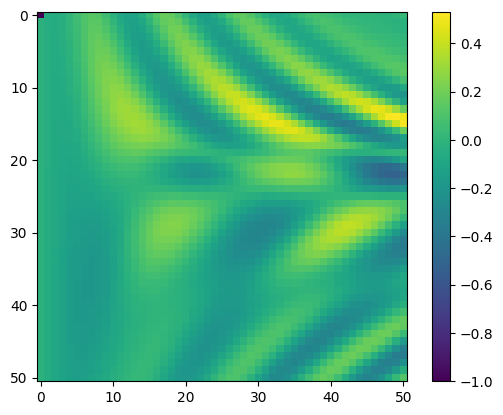

In [112]:
plt.imshow(Rabi_MOD - Rabi_num)
plt.colorbar()

In [91]:
Rabi_MOD.shape

(51, 379)

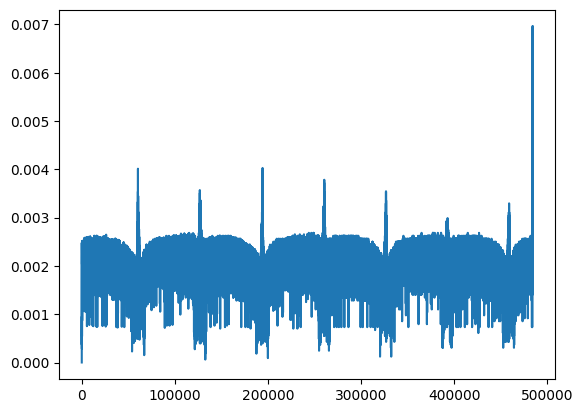

In [37]:
plt.plot(t[1:] - t[:-1])

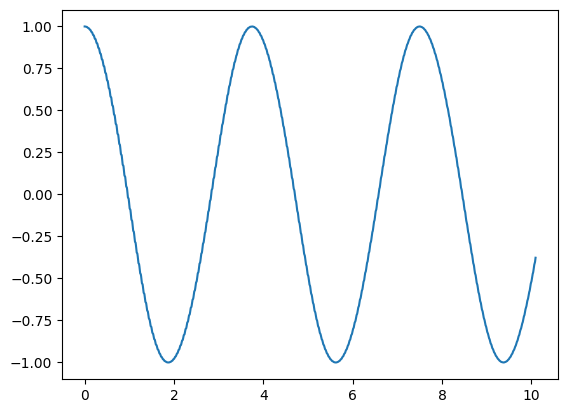

In [38]:
plt.plot(t[:5000], np.cos(phi[:5000]))

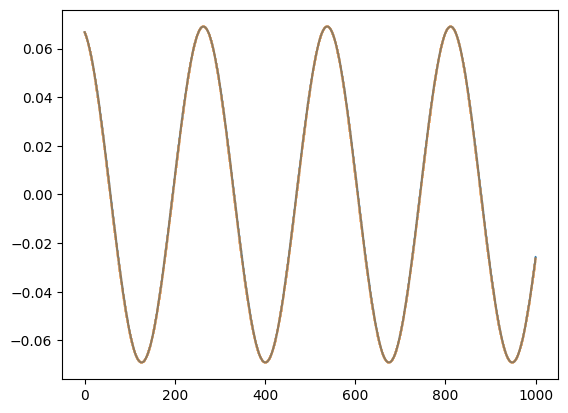

In [39]:
plt.plot(t, p_phi)
plt.plot(t, np.cos(the) * p_psi, alpha=0.5)

# VII- Conclusion :
